In [5]:
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library(reticulate)
library(celldex)
library(SingleR)
library(Seurat)
library(dplyr)
library(pheatmap)


Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLo

In [ ]:
rds_obj <-readRDS('../TumorSampleIntegration/Full500MergedTumorCtrlIntegratedAssay.rds')


In [ ]:
cell_types <- read.csv("UMAP_Integrated_withassignments_to.csv")
cell_types

Loading required package: ggplot2



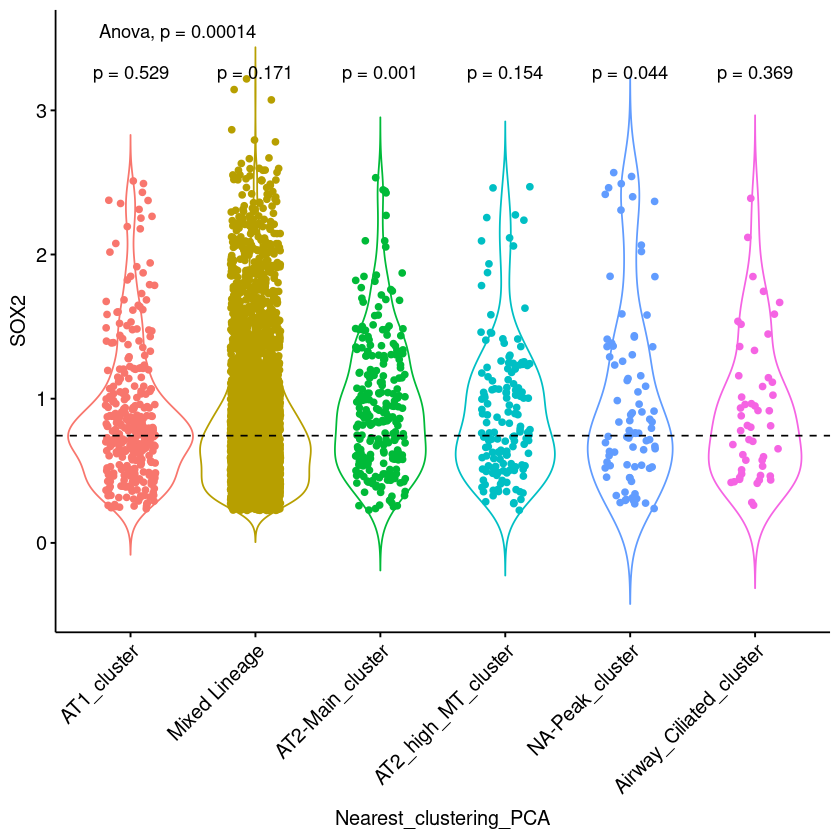

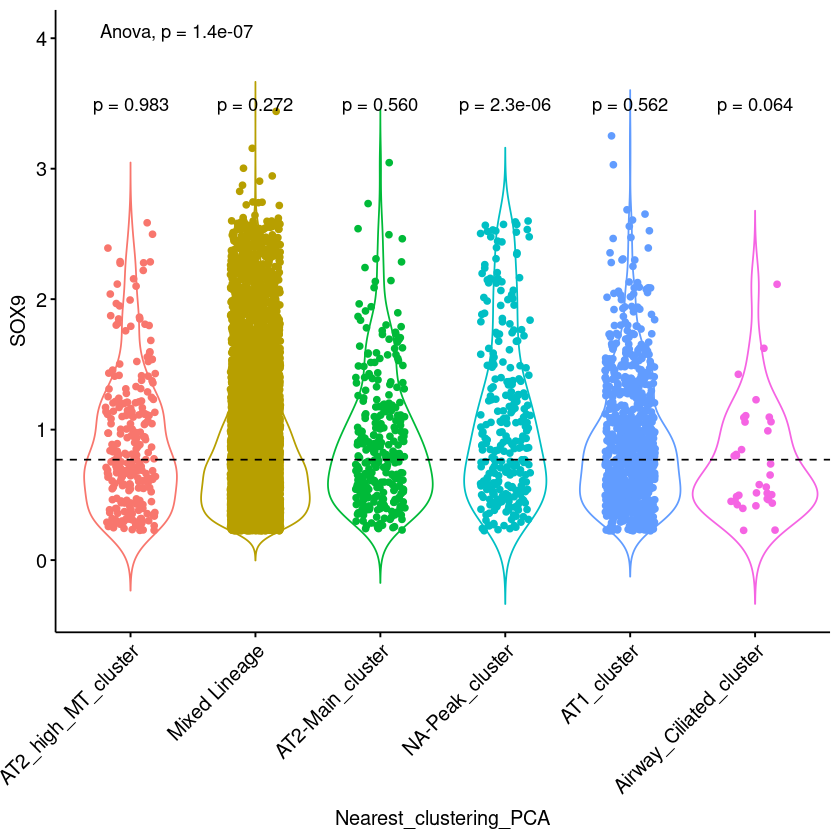

In [4]:
library("ggpubr")
# Visualize the expression profile
ggviolin(filter(cell_types, SOX2 != 0), x = "Nearest_clustering_PCA", y = "SOX2", 
          color = "Nearest_clustering_PCA", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = median(filter(cell_types, SOX2 != 0)$SOX2), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = 3.5)+        # Add global annova p-value
  stat_compare_means(label = "p.format", method = "t.test",
                     ref.group = ".all.")                      
             # Pairwise comparison against all

library("ggpubr")
# Visualize the expression profile
ggviolin(filter(cell_types, SOX9 != 0), x = "Nearest_clustering_PCA", y = "SOX9", 
          color = "Nearest_clustering_PCA", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = median(filter(cell_types, SOX9 != 0)$SOX9), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = 4)+        # Add global annova p-value
  stat_compare_means(label = "p.format", method = "t.test",
                     ref.group = ".all.")                      # Pairwise comparison against all

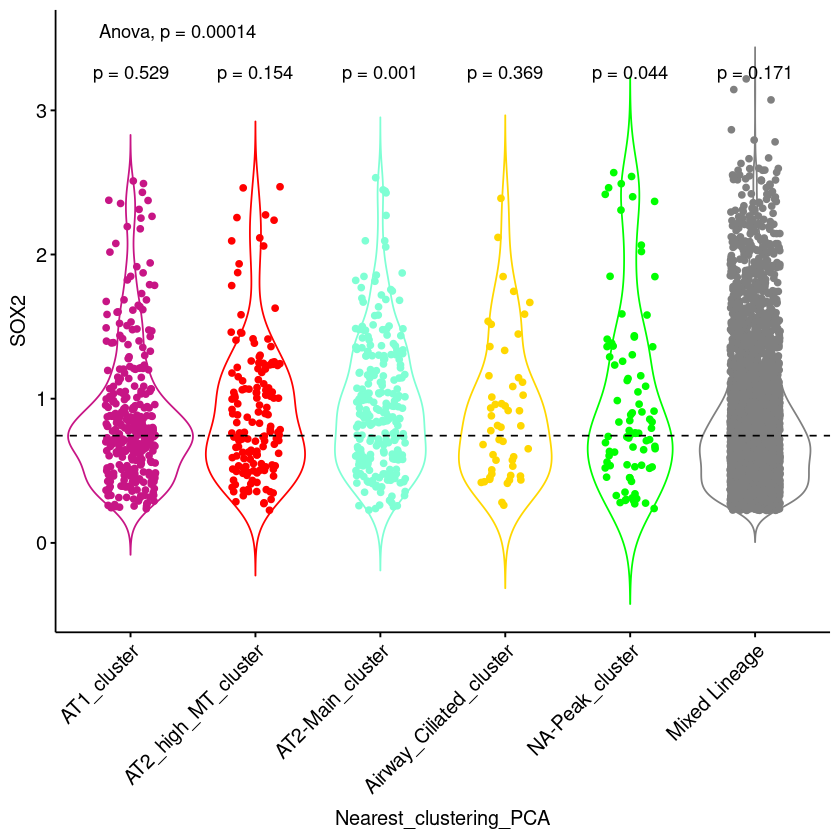

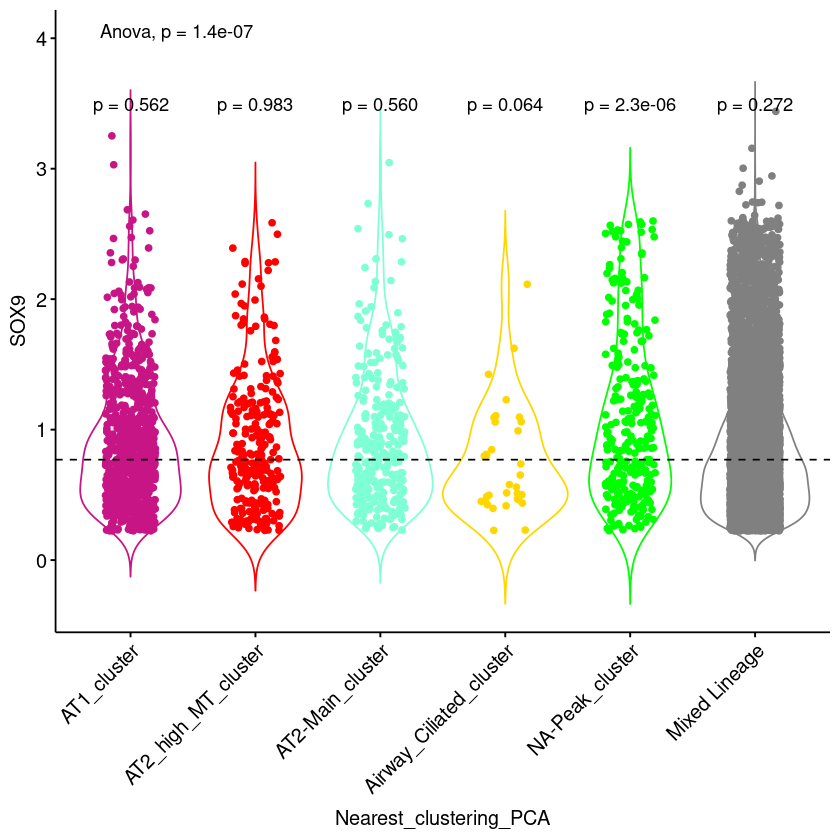

In [5]:
library("ggpubr")
# Visualize the expression profile
cell_types_filtered <- filter(cell_types, SOX2 != 0) %>%
  mutate(Nearest_clustering_PCA = factor(Nearest_clustering_PCA,
                                         levels = c("AT1_cluster", "AT2_high_MT_cluster", "AT2-Main_cluster",
                                                    "Airway_Ciliated_cluster", "NA-Peak_cluster", "Mixed Lineage")))
palette <- c(
 "AT2_high_MT_cluster" = "#ff0000",
 "Airway_Ciliated_cluster" = "#ffd700",
 "AT1_cluster" = "#c71585",
 "AT2-Main_cluster" = "#7fffd4", 
 "NA-Peak_cluster" = "#00ff00",
 "Mixed Lineage" = "#808080"
)
#pdf('SOX2_SOX9_ViolinPlots.pdf')

ggviolin(cell_types_filtered, x = "Nearest_clustering_PCA", y = "SOX2", 
         color = "Nearest_clustering_PCA", 
         add = "jitter", legend = "none") +
  rotate_x_text(angle = 45) +
  geom_hline(yintercept = median(cell_types_filtered$SOX2), linetype = 2) +
  stat_compare_means(method = "anova", label.y = 3.5) +
  stat_compare_means(label = "p.format", method = "t.test", ref.group = ".all.") +
  scale_color_manual(values = palette) # This assumes your color aesthetic is for lines/borders. Adjust if it's 'fill' for areas.



cell_types_filtered <- filter(cell_types, SOX9 != 0) %>%
  mutate(Nearest_clustering_PCA = factor(Nearest_clustering_PCA,
                                         levels = c("AT1_cluster", "AT2_high_MT_cluster", "AT2-Main_cluster",
                                                    "Airway_Ciliated_cluster", "NA-Peak_cluster", "Mixed Lineage")))
ggviolin(cell_types_filtered, x = "Nearest_clustering_PCA", y = "SOX9", 
         color = "Nearest_clustering_PCA", 
         add = "jitter", legend = "none") +
  rotate_x_text(angle = 45) +
  geom_hline(yintercept = median(cell_types_filtered$SOX9), linetype = 2) +
  stat_compare_means(method = "anova", label.y = 4) +
  stat_compare_means(label = "p.format", method = "t.test", ref.group = ".all.") +
  scale_color_manual(values = palette) # This assumes your color aesthetic is for lines/borders. Adjust if it's 'fill' for areas.

#dev.off()

In [6]:
cell_types

X,Unnamed..0,Nearest_clustering_PCA,SOX2,SOX9
<int>,<chr>,<chr>,<dbl>,<dbl>
0,Tumor_PA001_GCGAGAAGTACTTAGC-1,AT2-Main_cluster,0,0.0000000
1,Tumor_PA001_TCGGTAAAGGCAAAGA-1,Mixed Lineage,0,0.0000000
2,Tumor_PA001_CTCTAATCATGAGCGA-1,NA-Peak_cluster,0,0.0000000
3,Tumor_PA001_CTTTGCGAGACTGTAA-1,NA-Peak_cluster,0,0.0000000
4,Tumor_PA001_GTTACAGTCCAGAGGA-1,AT2_high_MT_cluster,0,0.0000000
5,Tumor_PA001_TGGCTGGGTACTCAAC-1,AT1_cluster,0,0.0000000
6,Tumor_PA001_AGCATACAGAACTCGG-1,AT2_high_MT_cluster,0,0.6874463
7,Tumor_PA001_CCGTTCACATCGTCGG-1,AT2-Main_cluster,0,0.0000000
8,Tumor_PA001_CATCGAATCGCTTAGA-1,AT2_high_MT_cluster,0,0.0000000


In [41]:
mixed_lineage = read.csv("mixed_nodes_random_walk_results.csv")
mixed_lineage$Unnamed..0 <- mixed_lineage$rownames

merged_df = merge(mixed_lineage, cell_types, by = "Unnamed..0", all.x = TRUE)
merged_df <- na.omit(merged_df)
options(repr.plot.width=15, repr.plot.height=8)



library("ggpubr")
# Visualize the expression profile
#cell_types_filtered <- filter(cell_types, SOX2 != 0) %>%
#  mutate(Nearest_clustering_PCA = factor(Nearest_clustering_PCA,
#                                         levels = c("AT1_cluster", "AT2_high_MT_cluster", "AT2-Main_cluster",
#                                                    "Airway_Ciliated_cluster", "NA-Peak_cluster", "Mixed Lineage")))

pdf('SOX2_SOX9_ViolinPlots_MixedLineage.pdf',  width=15, height=8)

ggviolin(filter(merged_df, SOX2 != 0), x = "Cluster", y = "SOX2", 
         add = "jitter", legend = "none") +
  rotate_x_text(angle = 45) +
  geom_hline(yintercept = median(filter(merged_df, SOX2 != 0)$SOX2), linetype = 2) +
  stat_compare_means(method = "anova", label.y = 3.5) +
  stat_compare_means(label = "p.format", method = "t.test", ref.group = ".all.") 



#cell_types_filtered <- filter(cell_types, SOX9 != 0) %>%
#  mutate(Nearest_clustering_PCA = factor(Nearest_clustering_PCA,
#                                         levels = c("AT1_cluster", "AT2_high_MT_cluster", "AT2-Main_cluster",
#                                                    "Airway_Ciliated_cluster", "NA-Peak_cluster", "Mixed Lineage")))
ggviolin(filter(merged_df, SOX9 != 0), x = "Cluster", y = "SOX9", 
         add = "jitter", legend = "none") +
  rotate_x_text(angle = 45) +
  geom_hline(yintercept = median(filter(merged_df, SOX9 != 0)$SOX9), linetype = 2) +
  stat_compare_means(method = "anova", label.y = 4) +
  stat_compare_means(label = "p.format", method = "t.test", ref.group = ".all.") 
dev.off()

png 
  2

In [8]:
all_random_walk <- read.csv("all_nodes_random_walk_results.csv")
rds_obj_t <- rds_obj[, all_random_walk$rownames]
rds_obj_t@meta.data$cluster<-all_random_walk$Cluster
all_random_walk$rownames
all_random_walk


[1] "Tumor_PA004_AACTTTCTCTCGAGTA-1"     
    [2] "Tumor_PA004_CTCGAGGTCAGAGACG-1"     
    [3] "Tumor_PA004_ATCACGACAAGTTCTG-1"     
    [4] "Tumor_PA004_ACGGCCAGTAAGTAGT-1"     
    [5] "Tumor_PA004_CGCGGTAGTTGACGTT-1"     
    [6] "Tumor_PA004_ATAACGCGTGCACGAA-1"     
    [7] "Tumor_PA004_AGGGATGAGTGGAGAA-1"     
    [8] "Tumor_PA004_ACATCAGTCCCTCTTT-1"     
    [9] "Tumor_PA004_GACGTGCGTAGCAAAT-1"     
   [10] "Tumor_PA004_GGGTCTGTCAGTTAGC-1"     
   [11] "Tumor_PA004_TGGGCGTGTCGAGATG-1"     
   [12] "Tumor_PA004_AACCATGGTTATCGGT-1"     
   [13] "Tumor_PA004_CCACGGACACTGTGTA-1"     
   [14] "Tumor_PA004_CACTCCATCTCGTATT-1"     
   [15] "Tumor_PA004_TCAGGATGTCCGTGAC-1"     
   [16] "Tumor_PA004_CTGGTCTCAGATGAGC-1"     
   [17] "Tumor_PA004_CAGCTGGTCGCGTTTC-1"     
   [18] "Tumor_PA004_CCATGTCGTGTTCGAT-1"     
   [19] "Tumor_PA004_CGATTGAAGCTAGGCA-1"     
   [20] "Tumor_PA004_AACCGCGTCTCCAGGG-1"     
   [21] "Tumor_PA004_TACTCATGTCTCTCTG-1"     
   [22] "Tumor_PA004_ATCACGATCTTTCCTC-1"     
   [23] "Tumor_PA004_ACACCCTCATGTCCTC-1"     
   [24] "Tumor_PA004_TATCAGGCACTGCCAG-1"     
   [25] "Tumor_PA004_ACGCCGAGTTAAAGTG-1"     
   [26] "Tumor_PA004_CCACTACGTCCAGTGC-1"     
   [27] "Tumor_PA004_ACGCCGATCAACTCTT-1"     
   [28] "Tumor_PA004_GAAATGAGTTAAGACA-1"     
   [29] "Tumor_PA004_TGCTACCTCCGAATGT-1"     
   [30] "Tumor_PA004_CACACTCTCTTGACGA-1"     
   [31] "Tumor_PA004_CTAACTTAGGGCTCTC-1"     
   [32] "Tumor_PA004_CGATGGCAGTGTCTCA-1"     
   [33] "Tumor_PA004_AGTTGGTCATCCAACA-1"     
   [34] "Tumor_PA004_ACTGATGGTAGCGTCC-1"     
   [35] "Tumor_PA004_CATTATCTCACCGGGT-1"     
   [36] "Tumor_PA004_GTGTTAGCAGTTAACC-1"     
   [37] "Tumor_PA004_CAGCTGGTCTTAGCCC-1"     
   [38] "Tumor_PA004_CTTACCGTCCTTTCTC-1"     
   [39] "Tumor_PA004_CTACACCAGTGACATA-1"     
   [40] "Tumor_PA004_TCTCATACAGACGCCT-1"     
   [41] "Tumor_PA004_GGTGAAGTCGCTTGTC-1"     
   [42] "Tumor_PA004_CCCAATCCAATCAGAA-1"     
   [43] "Tumor_PA004_GCAATCACAGCCACCA-1"     
   [44] "Tumor_PA004_TCTTCGGTCCGATATG-1"     
   [45] "Tumor_PA004_TTCTTAGGTACCGCTG-1"     
   [46] "Tumor_PA004_GCGCAACTCACCGGGT-1"     
   [47] "Tumor_PA004_GCATGCGGTACTTCTT-1"     
   [48] "Tumor_PA004_TCACGAATCGGTTAAC-1"     
   [49] "Tumor_PA004_ATCATCTTCGCCTGAG-1"     
   [50] "Tumor_PA004_AGTGAGGGTTTCCACC-1"     
   [51] "Tumor_PA004_TCGAGGCCACATGTGT-1"     
   [52] "Tumor_PA004_TCCACACCAATCGAAA-1"     
   [53] "Tumor_PA004_CTCCTAGCATCACGAT-1"     
   [54] "Tumor_PA004_GATCTAGTCCGAAGAG-1"     
   [55] "Tumor_PA004_GTTTCTAGTTAAAGAC-1"     
   [56] "Tumor_PA004_GATCAGTCAGGGTACA-1"     
   [57] "Tumor_PA004_ACTTTCAGTCCAGTAT-1"     
   [58] "Tumor_PA004_TGCGTGGCATTTGCTT-1"     
   [59] "Tumor_PA004_GGGCACTAGGGCTTCC-1"     
   [60] "Tumor_PA004_ACATCAGAGAATTGTG-1"     
   [61] "Tumor_PA004_CACCACTTCTTCGAGA-1"     
   [62] "Tumor_PA004_GTACTTTAGCACGCCT-1"     
   [63] "Tumor_PA004_TAAGAGAGTCTAGCGC-1"     
   [64] "Tumor_PA004_CTAGCCTAGCTGGAAC-1"     
   [65] "Tumor_PA004_CACATAGGTCAGTGGA-1"     
   [66] "Tumor_PA004_CGGAGCTGTCTCTTAT-1"     
   [67] "Tumor_PA004_ATCTGCCTCTTCCTTC-1"     
   [68] "Tumor_PA004_AACCGCGGTGTCAATC-1"     
   [69] "Tumor_PA004_GTCACAAAGGTGTTAA-1"     
   [70] "Tumor_PA004_TGGCGCATCGGTGTCG-1"     
   [71] "Tumor_PA004_AATCCAGGTGGTGTAG-1"     
   [72] "Tumor_PA004_ACTTACTAGACCCACC-1"     
   [73] "Tumor_PA004_CACACTCAGGCCCGTT-1"     
   [74] "Tumor_PA004_CTCGGGATCAAGGCTT-1"     
   [75] "Tumor_PA004_ATTGGACAGGATCGCA-1"     
   [76] "Tumor_PA004_ATGGGAGCAAGCTGAG-1"     
   [77] "Tumor_PA004_TTAGGCAAGCCCGAAA-1"     
   [78] "Tumor_PA004_CGACCTTTCCTAGTGA-1"     
   [79] "Tumor_PA004_CACCAGGAGTTAAGTG-1"     
   [80] "Tumor_PA004_GGACGTCTCAGAGCTT-1"     
   [81] "Tumor_PA004_TGTCCCAAGTCAAGGC-1"     
   [82] "Tumor_PA004_GACAGAGGTCTTGTCC-1"     
   [83] "Tumor_PA004_AAAGTAGTCAGCTTAG-1"     
   [84] "Tumor_PA004_TTGTAGGCATAAGACA-1"     
   [85] "Tumor_PA004_AGATCTGTCCGCATCT-1"     
   [86] "Tumor_PA004_TCGGTAATCAGGTTCA-1"     
   [87] "Tumor_PA004_GTTACAGCAGTATGCT-1"     
  

rownames,AT1_cluster,AT2_high_MT_cluster,AT2.Main_cluster,Mixed.Lineage,NA.Peak_cluster,Airway_Ciliated_cluster,AT2.Second_cluster,Cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Tumor_PA004_AACTTTCTCTCGAGTA-1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,AT2_high_MT_cluster
Tumor_PA004_CTCGAGGTCAGAGACG-1,0.03,0.03,0.01,0.01,0.89,0.00,0.03,NA-Peak_cluster
Tumor_PA004_ATCACGACAAGTTCTG-1,0.01,0.94,0.01,0.03,0.01,0.00,0.00,AT2_high_MT_cluster
Tumor_PA004_ACGGCCAGTAAGTAGT-1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,AT2_high_MT_cluster
Tumor_PA004_CGCGGTAGTTGACGTT-1,0.00,0.96,0.00,0.02,0.02,0.00,0.00,AT2_high_MT_cluster
Tumor_PA004_ATAACGCGTGCACGAA-1,0.02,0.95,0.02,0.00,0.00,0.01,0.00,AT2_high_MT_cluster
Tumor_PA004_AGGGATGAGTGGAGAA-1,0.06,0.91,0.00,0.01,0.02,0.00,0.00,AT2_high_MT_cluster
Tumor_PA004_ACATCAGTCCCTCTTT-1,0.00,0.00,0.01,0.02,0.94,0.00,0.03,NA-Peak_cluster
Tumor_PA004_GACGTGCGTAGCAAAT-1,0.03,0.00,0.03,0.00,0.94,0.00,0.00,NA-Peak_cluster


In [13]:
#Idents(rds_obj_t) <- 'cluster'
#mark_rds_obj_t <- FindAllMarkers(rds_obj_t)
#saveRDS(mark_rds_obj_t, "mixed_lineage_cell_markers.rds")
mark_rds_obj_t<-readRDS("mixed_lineage_cell_markers.rds")

In [3]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)

pdf(paste0("mixed_lineagecluster_gsea_results.pdf"), width = 10, height = 10)

# List of cluster values
# Loop through cluster values
#for (cluster in unique(mark_rds_obj_t$cluster)) {
for (cluster in 1:15) {

  genes <- mark_rds_obj_t[mark_rds_obj_t$cluster == cluster & mark_rds_obj_t$p_val_adj < 0.05 & 
                            mark_rds_obj_t$avg_log2FC > 0, ]$gene
    
  if (length(genes) > 0) {  # read signature
    dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
    if (websiteLive) {
      enriched <- enrichr(genes, dbs)
    }
    
    mut_enr_ch <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base = 10))
    mut_enr_go <- mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base = 10))
    
    dim(mut_enr_ch)
    dim(mut_enr_go)
    
    mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
    
    dim(mut_enr)
    
    mp <- "meta-program 10"
    cohort <- paste0("nsclc cluster: ", cluster)
    enrichdbs <- "Cancer_Hallmarks_and_Gene_Ontology"
    topn <- "Top25"
    h_mut_enr1 <- mut_enr[1:25, ]
    h_mut_enr <- mut_enr[1:25, ]
    h_mut_enr_167 <- h_mut_enr1
    
    ggp <- h_mut_enr %>%
      ggplot(aes(qscore, reorder(Term, qscore), fill = as.numeric(P.value))) +  # Convert P.value to numeric
      scale_fill_gradient(low = "red", high = "blue") +
      geom_bar(stat = "identity") +
      theme(legend.position = "bottom", axis.title.y = element_blank()) +
      geom_text(
        aes(label = paste("P.val=", round(P.value, 3))),
        color = "black",
        size = 4,
        hjust = 1, nudge_x = 2
      ) + theme_bw()
    
    myggp <- ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50)) +
      ggtitle(paste(mp, ": ", cohort, "\n", enrichdbs, ": top = ", topn, "_genes")) +
      xlab("qscore") + ylab("Description")
    
    # Print the plot for the current cluster
    print(myggp)
  }
}

# Close the PDF
dev.off()


Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_202

png 
  2

[1] 1


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 2


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 3


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 4


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 5


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 6


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 7


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 8


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 9


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 10


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 11


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 12


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 13


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 14


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] 15


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


In [19]:
all_rows = c()
for (val in  1:15) {
    
        print(val)
        genes <- mark_rds_obj_t[mark_rds_obj_t$cluster == val & mark_rds_obj_t$p_val_adj < 0.05 & 
                            mark_rds_obj_t$avg_log2FC > 0, ]$gene

        # Load Enrichr and check website status
        listEnrichrSites()
        setEnrichrSite("Enrichr") # Set to human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()
        if (is.null(dbs)) websiteLive <- FALSE
        if (websiteLive) head(dbs)

        # read signature
        dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
        if (websiteLive) {
          enriched <- enrichr(genes, dbs)
          mut_enr_ch <- mutate(enriched[[1]], qscore = -log10(Adjusted.P.value))
          mut_enr_go <- mutate(enriched[[2]], qscore = -log10(Adjusted.P.value))

          mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
          filtered_mut_enr <- subset(mut_enr[1:25, ], P.value <0.05)
          filtered_mut_enr$interaction <- val

          all_rows <- c(all_rows,filtered_mut_enr$Term )
        
    }
}
all_rows <- unique(all_rows)
all_dfs = list()
for (val in  1:15) {
    
        print(val)
        genes <- mark_rds_obj_t[mark_rds_obj_t$cluster == val & mark_rds_obj_t$p_val_adj < 0.05 & 
                            mark_rds_obj_t$avg_log2FC > 0, ]$gene

        # Load Enrichr and check website status
        listEnrichrSites()
        setEnrichrSite("Enrichr") # Set to human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()
        if (is.null(dbs)) websiteLive <- FALSE
        if (websiteLive) head(dbs)

        # read signature
        dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
        if (websiteLive) {
          enriched <- enrichr(genes, dbs)
          mut_enr_ch <- mutate(enriched[[1]], qscore = -log10(Adjusted.P.value))
          mut_enr_go <- mutate(enriched[[2]], qscore = -log10(Adjusted.P.value))

          mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
          filtered_mut_enr <- subset(mut_enr, Term %in% all_rows)
          filtered_mut_enr$interaction <- val
          all_dfs <- append(all_dfs, list(filtered_mut_enr))
          print(filtered_mut_enr$Adjusted.P.value)
            
        
    }
}

combined_df_all <- bind_rows(all_dfs)


library(ggplot2)
pdf("bubbleplot_CNS.pdf", width = 12, height = 8)
combined_df_all$interaction <- as.factor(combined_df_all$interaction)

# Adjusted ggplot code for the combined_df DataFrame
ggp <- ggplot(combined_df_all, aes(x = interaction, y = Term, size = qscore, 
                        colour = ifelse(P.value < 0.05, "red", "grey"))) +
  geom_point() + 
  scale_colour_identity() +  # Use exact colors specified in the data
  theme_minimal() +
  labs(title = "Bubble Plot of Interaction Terms",
       x = "Interaction",
       y = "Term",
       size = "Q Score",
       color = "P-Value Significance") +
  theme( axis.text.x = element_text(angle = 90, vjust = 0.5))

# Remove legend for color if not needed
print(ggp)
dev.off()

[1] 1


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 4.433120e-07 4.436475e-04 4.436475e-04 1.279540e-03 2.786448e-03
 [6] 6.052693e-03 1.395594e-02 1.395594e-02 1.395594e-02 1.456967e-02
[11] 2.777208e-02 3.348419e-02 5.431152e-02 5.431152e-02 5.431152e-02
[16] 7.046116e-02 7.046116e-02 1.602731e-01 1.602731e-01 1.602731e-01
[21] 1.602731e-01 1.602731e-01 1.602731e-01 1.602731e-01 1.602731e-01
[26] 3.470927e-01 4.412513e-01 4.749389e-01 4.749389e-01 3.339520e-02
[31] 7.373785e-02 9.948237e-02 9.948237e-02 1.382739e-01 1.382739e-01
[36] 2.121730e-01 2.406597e-01 2.595782e-01 2.848025e-01 2.893835e-01
[41] 2.893835e-01 3.072492e-01 3.092744e-01 3.137781e-01 3.152337e-01
[46] 3.371902e-01
[1] 2


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.1379322 0.2509975 0.2509975 0.2509975 0.2509975 0.3038081 0.3038081
 [8] 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081
[15] 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081 0.3038081
[22] 0.3038081 0.3038081 0.1228723 0.5921943 0.6109885
[1] 3


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.03447563 0.03447563 0.03447563 0.28246055 0.28246055 0.28246055
 [7] 0.28246055 0.28246055 0.28246055 0.28246055 0.28246055 0.28246055
[13] 0.28246055 0.28246055 0.28246055 0.28246055 0.28246055 0.28246055
[19] 0.08753372 0.12797337 0.16984821 0.58233731 0.59470865
[1] 4


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.01541067 0.01541067 0.01541067 0.08800558 0.08800558 0.08800558
 [7] 0.08800558 0.14653974 0.22229613 0.22229613 0.22229613 0.22229613
[13] 0.22229613 0.22229613 0.22229613 0.22229613 0.22229613 0.22229613
[19] 0.22229613 0.22229613 0.03336709 0.08026642 0.08026642 0.12050051
[25] 0.15321726 0.16730665 0.20877057 0.32214297
[1] 5


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 7.060989e-03 7.060989e-03 7.060989e-03 7.060989e-03 3.624753e-02
 [6] 3.624753e-02 3.624753e-02 3.624753e-02 6.442655e-02 1.375793e-01
[11] 1.375793e-01 1.375793e-01 1.375793e-01 1.375793e-01 1.375793e-01
[16] 1.886239e-01 3.063160e-01 3.063160e-01 3.148077e-01 3.511932e-01
[21] 3.511932e-01 3.511932e-01 3.511932e-01 3.511932e-01 3.511932e-01
[26] 3.511932e-01 7.747876e-11 7.747876e-11 7.747876e-11 7.390476e-02
[31] 7.943776e-02 1.079388e-01 1.554795e-01 2.040670e-01 2.800168e-01
[36] 5.442906e-01
[1] 6


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 8.761431e-11 1.122750e-05 4.040912e-05 4.040912e-05 4.040912e-05
 [6] 2.311954e-04 2.311954e-04 1.941132e-03 1.970430e-03 4.365919e-03
[11] 4.365919e-03 4.365919e-03 4.365919e-03 4.365919e-03 4.365919e-03
[16] 4.365919e-03 2.145805e-02 7.931832e-02 7.942482e-02 7.942482e-02
[21] 1.139383e-01 2.152460e-01 2.152460e-01 2.152460e-01 2.152460e-01
[26] 3.409295e-01 3.578025e-01 3.697219e-01 3.697219e-01 4.374726e-01
[31] 5.410923e-01 5.755019e-01 6.947236e-01 7.164081e-01 7.164081e-01
[36] 2.072233e-02 7.845148e-02 1.032865e-01 1.395966e-01 1.888372e-01
[41] 2.030904e-01 2.030904e-01 2.197315e-01 2.361722e-01 2.605247e-01
[46] 2.767450e-01 3.118894e-01 3.280813e-01 3.569862e-01 3.823996e-01
[51] 4.344066e-01 4.571694e-01 4.733238e-01 4.744314e-01 4.832166e-01
[56] 4.853873e-01
[1] 7


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.01017500 0.03346970 0.05852673 0.05852673 0.05852673 0.05852673
 [7] 0.05852673 0.04827253 0.04827253 0.04827253 0.04827253 0.04827253
[13] 0.04827253 0.05423208 0.05423208 0.05907368 0.05907368 0.06318745
[19] 0.06551458 0.06813640 0.06813640 0.06813640 0.06813640 0.06813640
[25] 0.06813640 0.31353690
[1] 8


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.003470502 0.015828787 0.029300858 0.210603765 0.260461801 0.260461801
 [7] 0.260461801 0.260461801 0.260461801 0.260461801 0.260461801 0.260461801
[13] 0.260461801 0.260461801 0.260461801 0.074007580 0.074007580 0.074007580
[19] 0.074007580 0.074007580 0.074007580 0.075555008 0.075555008 0.088406108
[25] 0.090796193 0.169846041 0.171653847 0.171670887
[1] 9


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 8.653155e-05 2.798797e-03 1.497124e-01 1.750751e-01 1.750751e-01
 [6] 1.750751e-01 1.750751e-01 1.750751e-01 1.750751e-01 1.750751e-01
[11] 1.761277e-01 2.148946e-01 2.664196e-01 3.391497e-01 3.391497e-01
[16] 3.446257e-01 3.446257e-01 3.446257e-01 3.446257e-01 3.446257e-01
[21] 3.446257e-01 3.446257e-01 1.390122e-02 1.233847e-01 1.233847e-01
[26] 1.297936e-01 1.457425e-01 2.246440e-01 3.362977e-01 3.692649e-01
[31] 4.797868e-01
[1] 10


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 4.848950e-09 4.495071e-08 9.183734e-05 4.197814e-03 1.306489e-02
 [6] 1.525315e-02 2.116003e-02 2.116003e-02 2.116003e-02 2.116003e-02
[11] 2.368037e-02 2.368037e-02 8.091930e-02 9.133073e-02 1.147006e-01
[16] 2.423076e-01 2.423076e-01 2.547644e-01 2.652590e-01 2.652590e-01
[21] 2.652590e-01 2.773142e-01 4.611587e-01 5.156351e-01 5.156351e-01
[26] 5.156351e-01 5.156351e-01 5.156351e-01 2.554650e-02 5.070086e-02
[31] 6.106064e-02 7.174487e-02 1.628954e-01 1.829606e-01 1.875471e-01
[36] 1.875471e-01 2.364678e-01 3.041130e-01
[1] 11


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.006244494 0.085576634 0.085576634 0.120400563 0.166396972 0.255266970
 [7] 0.255266970 0.255266970 0.255266970 0.255266970 0.255266970 0.304804817
[13] 0.375375136 0.430841850 0.430841850 0.430841850 0.430841850 0.430841850
[19] 0.430841850 0.430841850 0.430841850 0.430841850 0.087205762 0.108859922
[25] 0.117497130 0.122403392 0.136385963 0.137084193 0.138219754 0.140878321
[31] 0.144004607 0.170142569 0.193325884 0.207995656 0.222589244 0.265427389
[1] 12


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 1.761728e-07 1.261904e-05 2.487203e-04 4.277051e-03 1.057192e-02
 [6] 1.057192e-02 5.816839e-02 6.640199e-02 6.640199e-02 1.725833e-01
[11] 1.842668e-01 1.842668e-01 1.842668e-01 1.842668e-01 1.842668e-01
[16] 3.572452e-01 3.572452e-01 3.572452e-01 3.572452e-01 3.572452e-01
[21] 5.551244e-01 6.385533e-01 6.385533e-01 6.385533e-01 6.385533e-01
[26] 6.385533e-01 1.593990e-34 1.847080e-34 1.847080e-34 1.453429e-01
[31] 1.721166e-01 1.986210e-01 2.046517e-01 2.418405e-01 3.317484e-01
[36] 3.765679e-01 3.859980e-01 4.078339e-01 8.574632e-01 9.280517e-01
[41] 9.450798e-01
[1] 13


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 3.058183e-12 3.839007e-07 9.132713e-05 9.875707e-05 1.990463e-04
 [6] 2.111138e-03 4.518002e-03 7.372922e-03 2.862144e-02 3.358978e-02
[11] 3.358978e-02 3.358978e-02 8.842728e-02 1.607751e-01 1.821712e-01
[16] 1.821712e-01 1.821712e-01 1.821712e-01 1.821712e-01 1.821712e-01
[21] 1.821712e-01 7.859265e-04 4.166287e-03 1.510400e-02 2.308620e-02
[26] 5.499356e-02 1.062209e-01
[1] 14


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 5.428909e-04 5.428909e-04 1.748262e-03 8.103232e-03 1.000597e-02
 [6] 1.000597e-02 1.000597e-02 2.520271e-02 2.520271e-02 2.520271e-02
[11] 2.520271e-02 2.520271e-02 2.520271e-02 2.520271e-02 2.520271e-02
[16] 2.520271e-02 2.520271e-02 1.103538e-01 1.103538e-01 2.201956e-01
[21] 2.361718e-01 2.714115e-01 2.794438e-01 2.794438e-01 2.794438e-01
[26] 2.794438e-01 5.542793e-01 5.725352e-01 5.919892e-01 5.919892e-01
[31] 2.616523e-17 2.618574e-17 2.618574e-17 4.902662e-02 1.480669e-01
[36] 1.749557e-01 1.749557e-01 1.971101e-01 2.380864e-01 2.570998e-01
[41] 2.971465e-01 3.513226e-01 3.693055e-01 3.826497e-01 4.412837e-01
[46] 6.243367e-01 8.859813e-01
[1] 15


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.003552493 0.010123936 0.010123936 0.010123936 0.040283661 0.045330249
 [7] 0.045330249 0.045330249 0.072068170 0.076591959 0.114586840 0.150883142
[13] 0.150883142 0.150883142 0.150883142 0.321273991 0.321273991 0.339751684
[19] 0.389245623 0.389245623 0.389245623 0.389245623 0.389245623 0.389245623
[25] 0.389245623 0.004200594 0.004200594 0.004200594 0.004200594 0.113228260
[31] 0.127137238 0.127137238 0.134919684 0.152461779 0.236691333 0.364916882
[37] 0.388040318 0.924035892


png 
  2

In [67]:
rds_obj_t@meta.data <- rds_obj_t@meta.data %>%
  mutate(cluster = as.character(cluster))  # Ensure 'cluster' is numeric

# Set identities based on ordered cluster
Idents(rds_obj_t) <- factor(rds_obj_t@meta.data$cluster, levels = c(
        'AT1_cluster','AT2-Main_cluster','AT2_high_MT_cluster','Airway_Ciliated_cluster', 'NA-Peak_cluster',
        '1', '2', '3', '4', '5', '6','7','8','9','10','11','12','13', '14','15'))


In [68]:
unique(rds_obj_t@meta.data$cluster)

[1] "AT2_high_MT_cluster"     "NA-Peak_cluster"        
 [3] "AT1_cluster"             "AT2-Main_cluster"       
 [5] "Airway_Ciliated_cluster" "15"                     
 [7] "14"                      "2"                      
 [9] "3"                       "9"                      
[11] "12"                      "7"                      
[13] "8"                       "4"                      
[15] "11"                      "1"                      
[17] "5"                       "6"                      
[19] "10"                      "13"

In [5]:




marker_tumor_rds_obj2 <- readRDS("filtered_markers_tumor_gene_type.rds")
mark_rds_obj2_filt <- mark_rds_obj_t[!grepl("^MT", rownames(mark_rds_obj_t)), , drop = FALSE]

#pdf(paste0("mixed_lineage_dge_dotplot.pdf"), width = 25, height = 9)


top_genes_per_cluster <- mark_rds_obj2_filt %>%
  group_by(cluster) %>%
  top_n(-5, p_val_adj) %>%
  arrange(cluster, p_val_adj)

# Get unique list of genes for DotPlot
unique_genes <- unique(top_genes_per_cluster$gene)
unique_genes

g = DotPlot(rds_obj_t, features = unique_genes) +
  RotatedAxis() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Improve axis label readability
print(g)
#dev.off()

[1] "VEGFA"     "ERRFI1"    "NR4A1"     "DUSP1"     "FOS"       "RPL3"     
 [7] "RPL28"     "ACTB"      "HSP90AB1"  "CFL1"      "SAMD4A"    "SVIL"     
[13] "CASC15"    "ANTXR2"    "THSD4"     "ERBB4"     "TOX"       "MAPK10"   
[19] "LMCD1-AS1" "PPM1L"     "PRKN"      "UBC"       "WWOX"      "CHST11"   
[25] "EEF1A1"    "PTMA"      "FTL"       "GSTP1"     "HSPA8"     "ACTG1"    
[31] "HSP90AA1"  "CCSER1"    "HK2"       "STPG2"     "UBE2E2"    "TTC28"    
[37] "RPS8"      "PFN1"      "RPL24"     "RPLP1"     "RPL14"     "RACK1"    
[43] "RPS18"     "EEF2"      "ENO1"      "SERF2"     "RPL30"     "RPS14"    
[49] "RPS2"      "RPLP0"     "RPL36A"    "RPL12"     "CHCHD2"    "RPS3"     
[55] "RPL13"     "NME2"      "STMN1"     "PPIA"      "RPL11"     "RPS6"     
[61] "RPS24"     "RPL10"     "H3F3B"     "RPL4"      "RPL18"     "RPL15"    
[67] "RPS7"      "MYL6"      "FTH1"      "FAU"       "RPL41"     "RPSA"     
[73] "EEF1G"     "H3F3A"     "PTMS"      "MAML2"     "ITGA1"     "SMC4"     
[79] "EZH2"      "CIT"       "CENPP"     "FN1"       "IGFBP4"    "CALD1"    
[85] "NAMPT"     "ZBTB16"    "ARHGAP26"  "ATXN1"     "NDRG1"     "FAM13A"   
[91] "NEAT1"     "ATF3"

ERROR: Error in DefaultAssay(object = object): object 'rds_obj_t' not found


In [14]:
library(fgsea)
#library(tidyverse)
library(grid)
library(gridExtra)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


marker_tumor_rds_obj2 <- readRDS("filtered_markers_tumor_gene_type.rds")
mark_rds_obj2_filt <- mark_rds_obj_t[!grepl("^MT", rownames(mark_rds_obj_t)), , drop = FALSE]
marker_tumor_rds_obj2_filt <- marker_tumor_rds_obj2[!grepl("^MT", rownames(marker_tumor_rds_obj2)), , drop = FALSE]

queries <- lapply(unique(marker_tumor_rds_obj2_filt$cluster),
      function(clust) {
        marker_tumor_rds_obj2_filt %>%
          filter(cluster==clust) %>%
          # filter(out >= 10) %>%
          slice_max(avg_log2FC, n=500) %>%
          .$gene
      }
    )

names(queries) <- unique(marker_tumor_rds_obj2_filt$cluster)
queries

pdf(paste0("mixed_lineage_cluster_fgsea_tumor_markers.pdf"), width = 10, height = 10)


w <- 14
h <- 5
options(repr.plot.width=w, repr.plot.height=h)
# Create an empty list to store results
res <- list()

# Open a single PDF file to save all plots
pdf('fgsea_mixed_lineage/combined_fgsea_plots_update.pdf', width=w, height=h)

# Loop through each subtype
for (subtype in 1:15) {
    bg_table <- mark_rds_obj2_filt %>%
        filter(cluster == subtype, p_val_adj < 0.1) %>%
        group_by(gene) %>%
        slice_max(abs(avg_log2FC), n=1) %>%
        ungroup() %>%
        arrange(avg_log2FC)
    bg_list <- setNames(bg_table$avg_log2FC, trimws(bg_table$gene))

    fgseaRes <- fgsea(pathways = queries, 
                      stats = bg_list,
                      minSize = 1,
                      maxSize = 9999999999,
                      eps = 0, 
                      nPermSimple = 10000) %>%
        mutate(bg_list_name = subtype)

    path_up <- fgseaRes[fgseaRes$ES > 0,] %>%
        arrange(pval) %>%
        .$pathway
    path_down <- fgseaRes[fgseaRes$ES < 0,] %>%
        arrange(pval) %>%
        .$pathway
    path_sort <- c(path_up, rev(path_down))
    
    res_plot <- plotGseaTable(queries[path_sort], 
                              bg_list, fgseaRes, 
                              gseaParam=0.5) +
                theme(plot.title = element_text(size = 36)) +
                ggtitle(paste0('Cluster: ', subtype))
    
    print(res_plot)  # Must use print to render plots in loop when plotting to a device

    res[[subtype]] <- fgseaRes 
}

# Close the PDF device
dev.off()
#res <- bind_rows(res)
#list('MP1'=c('gene1', 'gene2', 'gene3', ...),
#     'MP2'=c('gene4', 'gene5', 'gene6', ...))


$STK11_WT
  [1] "ZC3HAV1"     "ERBB4"       "TNS3"        "TRERF1"      "SRGAP1"     
  [6] "TM4SF1"      "PLEC"        "PPM1L"       "WWTR1"       "SORCS2"     
 [11] "DAPK2"       "PITPNC1"     "NAV1"        "PTPRN2"      "BTBD9"      
 [16] "CD55"        "MIR4435-2HG" "F3"          "CANX"        "BHLHE40"    
 [21] "CAMK2D"      "POLA1"       "KCNQ1OT1"    "LDHA"        "DUSP1"      
 [26] "RAI14"       "RPL10"       "SYNE2"       "ST5"         "MAN1A1"     
 [31] "RAB11FIP1"   "DLEU2"       "ZSWIM6"      "APBB2"       "MAML3"      
 [36] "ARHGAP26"    "NIBAN1"      "PLEKHA5"     "CIT"         "KRT8"       
 [41] "CRADD"       "ODC1"        "GMDS"        "AUTS2"       "WARS"       
 [46] "TTC28"       "PCLO"        "AC104123.1"  "LRIG3"       "SNED1"      
 [51] "TCF7L2"      "ID1"         "ATP11A"      "RPS3"        "AL050309.1" 
 [56] "HIST1H2AC"   "ZRANB2-AS2"  "FTL"         "EEF1A1"      "PPIA"       
 [61] "KRT18"       "ABLIM1"      "KRT7"        "EEF2"        "S100A6"     
 [66] "SAT1"        "RPL4"        "ZBTB20"      "PRKCE"       "SMAD3"      
 [71] "HIVEP3"      "PDGFC"       "KLF7"        "HELLS"       "MEGF9"      
 [76] "RPL3"        "RPSA"        "AC073529.1"  "GCLC"        "MYL6"       
 [81] "FTH1"        "MAGI1"       "FAM107B"     "TANC2"       "TMEM117"    
 [86] "SH3KBP1"     "PPIB"        "RPS14"       "IMMP2L"      "DOCK11"     
 [91] "PLD1"        "LMO7"        "ZBTB16"      "PDIA4"       "KIAA1217"   
 [96] "ENO1"        "RFTN1"       "RACK1"       "BCAR3"       "TMEM164"    
[101] "ATXN1"       "CALR"        "MCTP1"       "ATAD2"       "TAGLN2"     
[106] "DYSF"        "CDC14A"      "EZH2"        "GSTP1"       "TMTC2"      
[111] "ARID5B"      "CHST11"      "EXT1"        "MAP3K13"     "SCLT1"      
[116] "NR4A1"       "PSD3"        "NHSL1"       "FHIT"        "PARD3B"     
[121] "RPLP0"       "LINC01473"   "PLPP1"       "ACTG1"       "RNLS"       
[126] "EFNA5"       "CBLB"        "CTSD"        "NME2"        "HECW2"      
[131] "AL049828.1"  "HSP90AB1"    "SHROOM3"     "ALCAM"       "NFIA"       
[136] "GPR39"       "GLIS3"       "RPL11"       "H3F3A"       "ZFPM2-AS1"  
[141] "NAALADL2"    "B2M"         "GEM"         "MYO1E"       "CPM"        
[146] "KLF6"        "PLA2R1"      "LPCAT1"      "SLC7A11"     "XBP1"       
[151] "ATP1B1"      "RPS2"        "RAB31"       "VEGFA"       "AGAP1"      
[156] "EIF1"        "SNTB1"       "RAP2C-AS1"   "NCALD"       "AL008633.1" 
[161] "GPRC5A"      "DOCK9"       "FOS"         "ATF3"        "ITPR2"      
[166] "GALNT18"     "NBEA"        "SMYD3"       "STK33"       "SLC22A23"   
[171] "ANKRD36C"    "PALLD"       "MEIS2"       "STMN1"       "ATP8A1"     
[176] "FUT8"        "JUN"         "MBOAT2"      "OTUD7A"      "FAM160A1"   
[181] "ANXA3"       "FMN1"        "ULK4"        "PRKCA"       "PTPRM"      
[186] "MAP2"        "HSP90B1"     "PSAP"        "HLA-A"       "AC009226.1" 
[191] "SH3RF3"      "DANT2"       "SPRY4-AS1"   "NFIB"        "RPS24"      
[196] "ARHGAP10"    "EPHA4"       "PTPRK"       "LGALS3"      "ARHGAP42"   
[201] "MBNL1"       "LIMCH1"      "DGKH"        "CASC15"      "BACH1"      
[206] "PCAT1"       "RUNX1"       "HMGB3"       "SYTL2"       "TC2N"       
[211] "ELL2"        "MACROD2"     "MID1"        "ADD3"        "MICAL2"     
[216] "PTPRE"       "SIPA1L1"     "CAMK1D"      "FOXO3"       "CD44"       
[221] "MAST4"       "PLCB1"       "SNX25"       "H3F3B"       "NR6A1"      
[226] "WSB1"        "DCLK1"       "KSR1"        "TACC1"       "SOD2"       
[231] "ERO1A"       "KAZN"        "STPG2"       "PTMA"        "TBL1X"      
[236] "FKBP5"       "DEPTOR"      "MAPK10"      "HDAC2-AS2"   "CCSER1"     
[241] "GRB10"       "TOX"         "ITGA9"       "RPS6KA2"     "FMNL2"      
[246] "PDZD2"       "SSBP2"       "ACSL1"       "PBX3"        "CITED2"     
[251] "TNIK"        "RPL12"       "SOX4"        "SERF2"       "SLC9A9"     
[256] "TNS1"        "STK39"       "RASAL2"      "UBA6-AS1"    "IKZF2"      
[261] "HSP90AA1"    "DCBLD2"      "ST3

png 
  2

In [18]:
library(fgsea)
#library(tidyverse)
library(grid)
library(gridExtra)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


marker_tumor_rds_obj2 <- readRDS("filtered_markers_tumor_gene_type.rds")
mark_rds_obj2_filt <- mark_rds_obj_t[!grepl("^MT", rownames(mark_rds_obj_t)), , drop = FALSE]
marker_tumor_rds_obj2_filt <- marker_tumor_rds_obj2[!grepl("^MT", rownames(marker_tumor_rds_obj2)), , drop = FALSE]

queries <- lapply(unique(marker_tumor_rds_obj2_filt$cluster),
      function(clust) {
        marker_tumor_rds_obj2_filt %>%
          filter(cluster==clust) %>%
          # filter(out >= 10) %>%
          slice_max(avg_log2FC, n=500) %>%
          .$gene
      }
    )

names(queries) <- unique(marker_tumor_rds_obj2_filt$cluster)
queries



w <- 14
h <- 5
options(repr.plot.width=w, repr.plot.height=h)
# Create an empty list to store results
res <- list()

# Open a single PDF file to save all plots
all_fgsea_results <- list()

# Loop through each subtype
for (subtype in 1:15) {
    bg_table <- mark_rds_obj2_filt %>%
        filter(cluster == subtype, p_val_adj < 0.1) %>%
        group_by(gene) %>%
        slice_max(abs(avg_log2FC), n=1) %>%
        ungroup() %>%
        arrange(avg_log2FC)
    bg_list <- setNames(bg_table$avg_log2FC, trimws(bg_table$gene))

    fgseaRes <- fgsea(pathways = queries, 
                      stats = bg_list,
                      minSize = 1,
                      maxSize = 9999999999,
                      eps = 0, 
                      nPermSimple = 10000) %>%
        mutate(bg_list_name = subtype)
    all_fgsea_results[[paste0("ML",subtype)]] <- fgseaRes

}


$STK11_WT
  [1] "ZC3HAV1"     "ERBB4"       "TNS3"        "TRERF1"      "SRGAP1"     
  [6] "TM4SF1"      "PLEC"        "PPM1L"       "WWTR1"       "SORCS2"     
 [11] "DAPK2"       "PITPNC1"     "NAV1"        "PTPRN2"      "BTBD9"      
 [16] "CD55"        "MIR4435-2HG" "F3"          "CANX"        "BHLHE40"    
 [21] "CAMK2D"      "POLA1"       "KCNQ1OT1"    "LDHA"        "DUSP1"      
 [26] "RAI14"       "RPL10"       "SYNE2"       "ST5"         "MAN1A1"     
 [31] "RAB11FIP1"   "DLEU2"       "ZSWIM6"      "APBB2"       "MAML3"      
 [36] "ARHGAP26"    "NIBAN1"      "PLEKHA5"     "CIT"         "KRT8"       
 [41] "CRADD"       "ODC1"        "GMDS"        "AUTS2"       "WARS"       
 [46] "TTC28"       "PCLO"        "AC104123.1"  "LRIG3"       "SNED1"      
 [51] "TCF7L2"      "ID1"         "ATP11A"      "RPS3"        "AL050309.1" 
 [56] "HIST1H2AC"   "ZRANB2-AS2"  "FTL"         "EEF1A1"      "PPIA"       
 [61] "KRT18"       "ABLIM1"      "KRT7"        "EEF2"        "S100A6"     
 [66] "SAT1"        "RPL4"        "ZBTB20"      "PRKCE"       "SMAD3"      
 [71] "HIVEP3"      "PDGFC"       "KLF7"        "HELLS"       "MEGF9"      
 [76] "RPL3"        "RPSA"        "AC073529.1"  "GCLC"        "MYL6"       
 [81] "FTH1"        "MAGI1"       "FAM107B"     "TANC2"       "TMEM117"    
 [86] "SH3KBP1"     "PPIB"        "RPS14"       "IMMP2L"      "DOCK11"     
 [91] "PLD1"        "LMO7"        "ZBTB16"      "PDIA4"       "KIAA1217"   
 [96] "ENO1"        "RFTN1"       "RACK1"       "BCAR3"       "TMEM164"    
[101] "ATXN1"       "CALR"        "MCTP1"       "ATAD2"       "TAGLN2"     
[106] "DYSF"        "CDC14A"      "EZH2"        "GSTP1"       "TMTC2"      
[111] "ARID5B"      "CHST11"      "EXT1"        "MAP3K13"     "SCLT1"      
[116] "NR4A1"       "PSD3"        "NHSL1"       "FHIT"        "PARD3B"     
[121] "RPLP0"       "LINC01473"   "PLPP1"       "ACTG1"       "RNLS"       
[126] "EFNA5"       "CBLB"        "CTSD"        "NME2"        "HECW2"      
[131] "AL049828.1"  "HSP90AB1"    "SHROOM3"     "ALCAM"       "NFIA"       
[136] "GPR39"       "GLIS3"       "RPL11"       "H3F3A"       "ZFPM2-AS1"  
[141] "NAALADL2"    "B2M"         "GEM"         "MYO1E"       "CPM"        
[146] "KLF6"        "PLA2R1"      "LPCAT1"      "SLC7A11"     "XBP1"       
[151] "ATP1B1"      "RPS2"        "RAB31"       "VEGFA"       "AGAP1"      
[156] "EIF1"        "SNTB1"       "RAP2C-AS1"   "NCALD"       "AL008633.1" 
[161] "GPRC5A"      "DOCK9"       "FOS"         "ATF3"        "ITPR2"      
[166] "GALNT18"     "NBEA"        "SMYD3"       "STK33"       "SLC22A23"   
[171] "ANKRD36C"    "PALLD"       "MEIS2"       "STMN1"       "ATP8A1"     
[176] "FUT8"        "JUN"         "MBOAT2"      "OTUD7A"      "FAM160A1"   
[181] "ANXA3"       "FMN1"        "ULK4"        "PRKCA"       "PTPRM"      
[186] "MAP2"        "HSP90B1"     "PSAP"        "HLA-A"       "AC009226.1" 
[191] "SH3RF3"      "DANT2"       "SPRY4-AS1"   "NFIB"        "RPS24"      
[196] "ARHGAP10"    "EPHA4"       "PTPRK"       "LGALS3"      "ARHGAP42"   
[201] "MBNL1"       "LIMCH1"      "DGKH"        "CASC15"      "BACH1"      
[206] "PCAT1"       "RUNX1"       "HMGB3"       "SYTL2"       "TC2N"       
[211] "ELL2"        "MACROD2"     "MID1"        "ADD3"        "MICAL2"     
[216] "PTPRE"       "SIPA1L1"     "CAMK1D"      "FOXO3"       "CD44"       
[221] "MAST4"       "PLCB1"       "SNX25"       "H3F3B"       "NR6A1"      
[226] "WSB1"        "DCLK1"       "KSR1"        "TACC1"       "SOD2"       
[231] "ERO1A"       "KAZN"        "STPG2"       "PTMA"        "TBL1X"      
[236] "FKBP5"       "DEPTOR"      "MAPK10"      "HDAC2-AS2"   "CCSER1"     
[241] "GRB10"       "TOX"         "ITGA9"       "RPS6KA2"     "FMNL2"      
[246] "PDZD2"       "SSBP2"       "ACSL1"       "PBX3"        "CITED2"     
[251] "TNIK"        "RPL12"       "SOX4"        "SERF2"       "SLC9A9"     
[256] "TNS1"        "STK39"       "RASAL2"      "UBA6-AS1"    "IKZF2"      
[261] "HSP90AA1"    "DCBLD2"      "ST3

In [24]:


# Assuming 'all_fgsea_results' is your named list of data frames

# Add a new column to each data frame with its corresponding subtype name
# and select only relevant columns for merging
processed_list <- lapply(names(all_fgsea_results), function(subtype) {
  all_fgsea_results[[subtype]] %>%
    mutate(Subtype = subtype) %>%
    select(Subtype, pathway, NES)  # Assuming 'pathway' and 'NES' are columns you want to keep
})

# Combine all data frames into one
combined_df <- bind_rows(processed_list)

# Spread the data to wide format
final_df <- combined_df %>%
  pivot_wider(names_from = Subtype, values_from = NES, id_cols = pathway)

# Now `final_df` has one row per pathway and one column per subtype with NES values
write.csv(final_df, "fgsea_mixed_lineage/NES_scores.csv")

In [23]:
processed_list

Subtype,pathway,NES
<chr>,<chr>,<dbl>
ML1,KRAS_MUT,-1.331576
ML1,STK11_MUT_KRAS_MUT,-0.570954
ML1,STK11_MUT_KRAS_WT,-1.482819
ML1,STK11_WT,-1.105748
Subtype,pathway,NES
<chr>,<chr>,<dbl>
ML2,KRAS_MUT,-1.4285953
ML2,STK11_MUT_KRAS_MUT,-1.3449606
ML2,STK11_MUT_KRAS_WT,-1.2749685


In [25]:
mark_rds_obj2<- readRDS("filtered_markers_tumor_lineage.rds")

In [26]:
library(fgsea)
#library(tidyverse)
library(grid)
library(gridExtra)
mark_rds_obj2_filt <- mark_rds_obj2[!grepl("^MT", rownames(mark_rds_obj2)), , drop = FALSE]
marker_tumor_rds_obj2_filt <- marker_tumor_rds_obj2[!grepl("^MT", rownames(marker_tumor_rds_obj2)), , drop = FALSE]

queries <- lapply(unique(marker_tumor_rds_obj2_filt$cluster),
      function(clust) {
        marker_tumor_rds_obj2_filt %>%
          filter(cluster==clust) %>%
          # filter(out >= 10) %>%
          slice_max(avg_log2FC, n=500) %>%
          .$gene
      }
    )

names(queries) <- unique(marker_tumor_rds_obj2_filt$cluster)
queries

$STK11_WT
  [1] "ZC3HAV1"     "ERBB4"       "TNS3"        "TRERF1"      "SRGAP1"     
  [6] "TM4SF1"      "PLEC"        "PPM1L"       "WWTR1"       "SORCS2"     
 [11] "DAPK2"       "PITPNC1"     "NAV1"        "PTPRN2"      "BTBD9"      
 [16] "CD55"        "MIR4435-2HG" "F3"          "CANX"        "BHLHE40"    
 [21] "CAMK2D"      "POLA1"       "KCNQ1OT1"    "LDHA"        "DUSP1"      
 [26] "RAI14"       "RPL10"       "SYNE2"       "ST5"         "MAN1A1"     
 [31] "RAB11FIP1"   "DLEU2"       "ZSWIM6"      "APBB2"       "MAML3"      
 [36] "ARHGAP26"    "NIBAN1"      "PLEKHA5"     "CIT"         "KRT8"       
 [41] "CRADD"       "ODC1"        "GMDS"        "AUTS2"       "WARS"       
 [46] "TTC28"       "PCLO"        "AC104123.1"  "LRIG3"       "SNED1"      
 [51] "TCF7L2"      "ID1"         "ATP11A"      "RPS3"        "AL050309.1" 
 [56] "HIST1H2AC"   "ZRANB2-AS2"  "FTL"         "EEF1A1"      "PPIA"       
 [61] "KRT18"       "ABLIM1"      "KRT7"        "EEF2"        "S100A6"     
 [66] "SAT1"        "RPL4"        "ZBTB20"      "PRKCE"       "SMAD3"      
 [71] "HIVEP3"      "PDGFC"       "KLF7"        "HELLS"       "MEGF9"      
 [76] "RPL3"        "RPSA"        "AC073529.1"  "GCLC"        "MYL6"       
 [81] "FTH1"        "MAGI1"       "FAM107B"     "TANC2"       "TMEM117"    
 [86] "SH3KBP1"     "PPIB"        "RPS14"       "IMMP2L"      "DOCK11"     
 [91] "PLD1"        "LMO7"        "ZBTB16"      "PDIA4"       "KIAA1217"   
 [96] "ENO1"        "RFTN1"       "RACK1"       "BCAR3"       "TMEM164"    
[101] "ATXN1"       "CALR"        "MCTP1"       "ATAD2"       "TAGLN2"     
[106] "DYSF"        "CDC14A"      "EZH2"        "GSTP1"       "TMTC2"      
[111] "ARID5B"      "CHST11"      "EXT1"        "MAP3K13"     "SCLT1"      
[116] "NR4A1"       "PSD3"        "NHSL1"       "FHIT"        "PARD3B"     
[121] "RPLP0"       "LINC01473"   "PLPP1"       "ACTG1"       "RNLS"       
[126] "EFNA5"       "CBLB"        "CTSD"        "NME2"        "HECW2"      
[131] "AL049828.1"  "HSP90AB1"    "SHROOM3"     "ALCAM"       "NFIA"       
[136] "GPR39"       "GLIS3"       "RPL11"       "H3F3A"       "ZFPM2-AS1"  
[141] "NAALADL2"    "B2M"         "GEM"         "MYO1E"       "CPM"        
[146] "KLF6"        "PLA2R1"      "LPCAT1"      "SLC7A11"     "XBP1"       
[151] "ATP1B1"      "RPS2"        "RAB31"       "VEGFA"       "AGAP1"      
[156] "EIF1"        "SNTB1"       "RAP2C-AS1"   "NCALD"       "AL008633.1" 
[161] "GPRC5A"      "DOCK9"       "FOS"         "ATF3"        "ITPR2"      
[166] "GALNT18"     "NBEA"        "SMYD3"       "STK33"       "SLC22A23"   
[171] "ANKRD36C"    "PALLD"       "MEIS2"       "STMN1"       "ATP8A1"     
[176] "FUT8"        "JUN"         "MBOAT2"      "OTUD7A"      "FAM160A1"   
[181] "ANXA3"       "FMN1"        "ULK4"        "PRKCA"       "PTPRM"      
[186] "MAP2"        "HSP90B1"     "PSAP"        "HLA-A"       "AC009226.1" 
[191] "SH3RF3"      "DANT2"       "SPRY4-AS1"   "NFIB"        "RPS24"      
[196] "ARHGAP10"    "EPHA4"       "PTPRK"       "LGALS3"      "ARHGAP42"   
[201] "MBNL1"       "LIMCH1"      "DGKH"        "CASC15"      "BACH1"      
[206] "PCAT1"       "RUNX1"       "HMGB3"       "SYTL2"       "TC2N"       
[211] "ELL2"        "MACROD2"     "MID1"        "ADD3"        "MICAL2"     
[216] "PTPRE"       "SIPA1L1"     "CAMK1D"      "FOXO3"       "CD44"       
[221] "MAST4"       "PLCB1"       "SNX25"       "H3F3B"       "NR6A1"      
[226] "WSB1"        "DCLK1"       "KSR1"        "TACC1"       "SOD2"       
[231] "ERO1A"       "KAZN"        "STPG2"       "PTMA"        "TBL1X"      
[236] "FKBP5"       "DEPTOR"      "MAPK10"      "HDAC2-AS2"   "CCSER1"     
[241] "GRB10"       "TOX"         "ITGA9"       "RPS6KA2"     "FMNL2"      
[246] "PDZD2"       "SSBP2"       "ACSL1"       "PBX3"        "CITED2"     
[251] "TNIK"        "RPL12"       "SOX4"        "SERF2"       "SLC9A9"     
[256] "TNS1"        "STK39"       "RASAL2"      "UBA6-AS1"    "IKZF2"      
[261] "HSP90AA1"    "DCBLD2"      "ST3

In [33]:
w <- 14
h <- 5
options(repr.plot.width=w, repr.plot.height=h)
res <- list()
all_fgsea_results_set_clusters <- list()
pdf("fgsea/all_fgsea.pdf", width=w, height=h)

for (subtype in unique(mark_rds_obj2_filt$cluster)) {

    bg_table <- mark_rds_obj2_filt %>%
                      filter(cluster == subtype) %>%
                      filter(p_val_adj < 0.1) %>%
                      group_by(gene) %>%  # For some reason, some celltypes have multiple entries for some genes
                      slice_max(abs(avg_log2FC), n=1) %>%
                      ungroup() %>%
                      arrange(avg_log2FC)
    bg_list <- bg_table$avg_log2FC
    names(bg_list) <- trimws(bg_table$gene)

    fgseaRes <- fgsea(pathways = queries, 
                  stats    = bg_list,
                  minSize  = 1,
                  maxSize  = 9999999999,
                  eps=0, nPermSimple = 10000) %>%
                  mutate(bg_list_name = subtype)
    all_fgsea_results_set_clusters[[subtype]] <- fgseaRes

    path_up <- fgseaRes[ES > 0][order(pval), pathway]
    path_down <- fgseaRes[ES < 0][order(pval), pathway]
    path_sort <- c(path_up, rev(path_down))
    res_plot <- plotGseaTable(queries[path_sort], 
                bg_list, fgseaRes, 
                gseaParam=0.5) %>%
                arrangeGrob(top=textGrob(paste0('Cluster: ', subtype), 
                                          gp=gpar(fontsize=36,font=8)))
    print(res_plot)  # Must use print to render plots in loop when plotting to a device


    res[[subtype]] <- fgseaRes 
}
dev.off()
#res <- bind_rows(res)
#list('MP1'=c('gene1', 'gene2', 'gene3', ...),
#     'MP2'=c('gene4', 'gene5', 'gene6', ...))


# Assuming 'all_fgsea_results' is your named list of data frames

# Add a new column to each data frame with its corresponding subtype name
# and select only relevant columns for merging
processed_list <- lapply(names(all_fgsea_results_set_clusters), function(subtype) {
  all_fgsea_results_set_clusters[[subtype]] %>%
    mutate(Subtype = subtype) %>%
    select(Subtype, pathway, NES)  # Assuming 'pathway' and 'NES' are columns you want to keep
})

# Combine all data frames into one
combined_df <- bind_rows(processed_list)

# Spread the data to wide format
final_df <- combined_df %>%
  pivot_wider(names_from = Subtype, values_from = NES, id_cols = pathway)

# Now `final_df` has one row per pathway and one column per subtype with NES values
write.csv(final_df, "fgsea/NES_scores.csv")

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRID.text.16481]
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRID.text.16896]
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRID.text.17311]
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRID.text.17726]
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRID.text.18141]
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name                  grob
1 1 (2-2,1-1) arrange        gtable[layout]
2 2 (1-1,1-1) arrange text[GRI

png 
  2

In [35]:
pdf("fgsea/all_fgsea.pdf", width=w, height=h)

for (subtype in unique(mark_rds_obj2_filt$cluster)) {

    bg_table <- mark_rds_obj2_filt %>%
                      filter(cluster == subtype) %>%
                      filter(p_val_adj < 0.1) %>%
                      group_by(gene) %>%  # For some reason, some celltypes have multiple entries for some genes
                      slice_max(abs(avg_log2FC), n=1) %>%
                      ungroup() %>%
                      arrange(avg_log2FC)
    bg_list <- bg_table$avg_log2FC
    names(bg_list) <- trimws(bg_table$gene)

    fgseaRes <- fgsea(pathways = queries, 
                  stats    = bg_list,
                  minSize  = 1,
                  maxSize  = 9999999999,
                  eps=0, nPermSimple = 10000) %>%
                  mutate(bg_list_name = subtype)
    all_fgsea_results_set_clusters[[subtype]] <- fgseaRes

    path_up <- fgseaRes[ES > 0][order(pval), pathway]
    path_down <- fgseaRes[ES < 0][order(pval), pathway]
    path_sort <- c(path_up, rev(path_down))
    res_plot <- plotGseaTable(queries[path_sort], 
                              bg_list, fgseaRes, 
                              gseaParam=0.5) +
                theme(plot.title = element_text(size = 36)) +
                ggtitle(paste0('Cluster: ', subtype))
    
    print(res_plot)  # Must use print to render plots in loop when plotting to a device

    res[[subtype]] <- fgseaRes 
}

# Close the PDF device
dev.off()


png 
  2

In [ ]:
cell_types <- read.csv("UMAP_Integrated_withassignments.csv")
cell_types<- filter(cell_types, Nearest_clustering_PCA != "Mixed Lineage")
cell_types<- filter(cell_types, Nearest_clustering_PCA != "AT2-Second_cluster")

rds_obj <- rds_obj[, cell_types$Unnamed..0]

assingments <- cell_types$Nearest_clustering_PCA
names(assingments) <- cell_types$Unnamed..0
rds_obj@meta.data$cell_type <- assingments

In [ ]:
Idents(object = rds_obj) <- 'cell_type'
DefaultAssay(object = rds_obj) <- "RNA"
rds_obj

In [35]:
VlnPlot(object = rds_obj, features = c('SOX2', 'SOX9'))


ERROR while rich displaying an object: Error in Ops.data.frame(guide_loc, panel_loc): ‘==’ only defined for equally-sized data frames

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.d

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [11]:

genes_of_interest <- c("SOX2", "SOX9")
expression_data <- GetAssayData(rds_obj,assay = "RNA", slot = "data")[genes_of_interest, ]
expression_data
write.csv(expression_data, file = "temp_expression.csv", row.names = TRUE)


   [[ suppressing 34 column names ‘Tumor_PA001_GCGAGAAGTACTTAGC-1’, ‘Tumor_PA001_TCGGTAAAGGCAAAGA-1’, ‘Tumor_PA001_CTCTAATCATGAGCGA-1’ ... ]]



2 x 177230 sparse Matrix of class "dgCMatrix"
                                                                               
SOX2 . . . . . . .         . . .        . . . . . . . . . . . . 0.9814547 . . .
SOX9 . . . . . . 0.6874463 . . 1.255987 . . . . . . . . . . . . .         . . .
                           
SOX2 . . . . . . . . ......
SOX9 . . . . . . . . ......

 .....suppressing 177196 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [ ]:
rds_obj <-readRDS('../TumorSampleIntegration/Full500MergedTumorCtrlIntegratedAssay.rds')
metadata_rownames <- rownames(rds_obj@meta.data)

# Find the rownames that start with 'Control'
control_rows <- grepl("^Control", metadata_rownames)

# Subset the Seurat object to remove rows that start with 'Control'
rds_obj <- rds_obj[, !control_rows]
rds_obj


In [7]:
rds_obj <- RunPCA(rds_obj)

PC_ 1 
Positive:  EEF1A1, FTL, FTH1, RPLP1, GSTP1, RPS2, RPL41, RPS18, RPL3, PTMA 
	   RPL28, ACTB, RPL13, RPL18, RPS8, EEF2, RPLP0, ACTG1, PTMS, HSP90AB1 
	   CFL1, RPS7, RPL30, MT-CO1, MTRNR2L12, EEF1G, RPL10, RPS6, RPS14, SERF2 
Negative:  FAM155A, ERBB4, WWOX, PDE4D, CCSER1, AUTS2, TTC28, KAZN, NRXN3, TOX 
	   IMMP2L, ATXN1, CADPS2, GBE1, MAST4, MACROD2, MAML3, INPP4B, FHIT, NEBL 
	   ZFPM2-AS1, PRKN, HIVEP3, FRY, ARHGAP26, NBEA, MAPK10, ZBTB16, NAALADL2, RAD51B 
PC_ 2 
Positive:  MT-CO2, MT-CO1, MT-CO3, MT-ND4L, MT-ND3, MT-ATP6, MT-CYB, MTRNR2L12, MT-ND1, MT-ND4 
	   MT-ATP8, MT-ND2, MT-ND5, MT-ND6, MTRNR2L8, CENPP, SLCO3A1, CTSD, FN1, TNS3 
	   SMYD3, KAZN, FHIT, PRKN, ITPR2, HELLS, HLA-A, LPCAT1, CIT, NCALD 
Negative:  ERRFI1, FTH1, RPL41, RPLP1, RPS18, NDRG1, RPL28, FTL, RPL3, RPL18 
	   RPS2, RPS8, GSTP1, ACTB, HSP90AA1, ACTG1, RPL13, EEF1A1, RPL30, VEGFA 
	   PTMA, UBC, FOS, HSP90AB1, NR4A1, FAM13A, RPLP0, NEAT1, RPS6, RPS7 
PC_ 3 
Positive:  SMC4, CIT, ERBB4, ATAD2, HELLS, C

An object of class Seurat 
68353 features across 14307 samples within 3 assays 
Active assay: integrated (500 features, 500 variable features)
 2 other assays present: RNA, SCT
 1 dimensional reduction calculated: pca

,PC_1,PC_2
,<dbl>,<dbl>
Tumor_PA001_TGTCCCAAGCTTCGCG-1,5.6293466,3.42103831
Tumor_PA004_GCCTCTACATGGTCTA-1,15.2857335,0.85038248
Tumor_PA004_AACTTTCTCTCGAGTA-1,1.0319933,13.10246706
Tumor_PA004_ACCAGTAAGCGCTCCA-1,-3.0007260,-1.91128462
Tumor_PA004_AGGTCATAGGCCCTTG-1,-5.6275869,-3.70670909
Tumor_PA004_GAGGTGACAGTAGAGC-1,-2.1506238,3.80107942
Tumor_PA004_ATTTCTGAGTACTTGC-1,-4.3861909,-3.42347889
Tumor_PA004_TGTATTCAGAGGTAGA-1,-3.5367485,-2.48892501
Tumor_PA004_CATCAGATCATGTCTT-1,-5.9239135,-3.07667328


In [ ]:
#write.csv(rds_obj@meta.data, "CT_metadata.csv")

In [ ]:
library(Seurat)
library(SeuratData)
library(SeuratDisk)

SaveH5Seurat(rds_obj, filename = "complete_tumor_raw.h5Seurat")



In [29]:
Convert("complete_tumor_raw.h5Seurat", dest = "h5ad")

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [2]:
rds_obj2 <- readRDS("../Full500MergedTumorCtrlIntegratedAssay.rds")



In [3]:
DefaultAssay(object = rds_obj2) <- "RNA"
rds_obj2

An object of class Seurat 
68353 features across 177230 samples within 3 assays 
Active assay: RNA (35999 features, 0 variable features)
 2 other assays present: SCT, integrated

In [4]:
rds_obj2@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient_long,patient,predicted_doublets,⋯,sequencing,RNA_snn_res.0.8,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,cell_type_fine
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Tumor_PA001_GCGAGAAGTACTTAGC-1,PA001,20491,6976,0.59050315,0.21472842,0.17568689,0.39041530,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_TCGGTAAAGGCAAAGA-1,PA001,18659,5631,1.04507208,0.11790557,0.12326491,0.24117048,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_CTCTAATCATGAGCGA-1,PA001,17974,5562,0.86792033,0.13908980,0.12796261,0.26705241,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_CTTTGCGAGACTGTAA-1,PA001,11223,4085,1.60384924,0.11583356,0.11583356,0.23166711,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_GTTACAGTCCAGAGGA-1,PA001,9885,4203,1.40617097,0.06069803,0.09104704,0.15174507,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_TGGCTGGGTACTCAAC-1,PA001,9868,4037,0.10133766,0.19254155,0.10133766,0.29387921,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_AGCATACAGAACTCGG-1,PA001,10115,4743,3.03509639,0.18783984,0.20761246,0.39545230,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_CCGTTCACATCGTCGG-1,PA001,8933,4394,4.27627897,0.20150006,0.15672227,0.35822232,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Tumor_PA001_CATCGAATCGCTTAGA-1,PA001,8027,3479,1.88115111,0.08720568,0.14949545,0.23670113,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
data <- read.csv("all_cell_assignments.csv")

rownames(data)<- data$Unnamed..0.1
data

,X,Unnamed..0.1,UMAP_1,UMAP_2,Unnamed..0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,⋯,long__AT21,long__AEP1,devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1,devST__ASC_SMITH_CELL20181,devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1,devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1,devST__AEP_MORRISEY_2FC1,devST__Cluster_211,Nearest_clustering_PCA,Cluster21
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Tumor_PA001_GCGAGAAGTACTTAGC-1,0,Tumor_PA001_GCGAGAAGTACTTAGC-1,5.3540993,3.5616727,Tumor_PA001_GCGAGAAGTACTTAGC-1,PA001,20491,6976,0.59050315,0.21472842,⋯,-0.178013483,-0.047405109,0.052140095,0.112372293,-0.080814625,-0.035106419,-0.047405109,-0.03632221,AT2-Main_cluster,True
Tumor_PA001_TCGGTAAAGGCAAAGA-1,1,Tumor_PA001_TCGGTAAAGGCAAAGA-1,-3.6458931,1.4155787,Tumor_PA001_TCGGTAAAGGCAAAGA-1,PA001,18659,5631,1.04507208,0.11790557,⋯,-0.102698703,-0.074431080,-0.162697942,0.115103441,0.469005322,0.136762603,-0.074431080,0.94942530,Mixed Lineage,True
Tumor_PA001_CTCTAATCATGAGCGA-1,2,Tumor_PA001_CTCTAATCATGAGCGA-1,-3.5031063,1.3158399,Tumor_PA001_CTCTAATCATGAGCGA-1,PA001,17974,5562,0.86792033,0.13908980,⋯,-0.103923962,-0.083074603,-0.150325190,0.128260225,0.444856766,0.146909510,-0.083074603,0.85920868,NA-Peak_cluster,True
Tumor_PA001_CTTTGCGAGACTGTAA-1,3,Tumor_PA001_CTTTGCGAGACTGTAA-1,-3.2301893,1.3233529,Tumor_PA001_CTTTGCGAGACTGTAA-1,PA001,11223,4085,1.60384924,0.11583356,⋯,-0.042420742,-0.077642138,-0.112826920,0.135398245,0.334995567,0.205436881,-0.077642138,0.89707012,NA-Peak_cluster,True
Tumor_PA001_GTTACAGTCCAGAGGA-1,4,Tumor_PA001_GTTACAGTCCAGAGGA-1,-3.5141933,3.1149833,Tumor_PA001_GTTACAGTCCAGAGGA-1,PA001,9885,4203,1.40617097,0.06069803,⋯,-0.071910657,-0.102457619,-0.113800781,0.196323071,0.239881864,0.058628108,-0.102457619,0.83059123,AT2_high_MT_cluster,True
Tumor_PA001_TGGCTGGGTACTCAAC-1,5,Tumor_PA001_TGGCTGGGTACTCAAC-1,-1.6125794,-0.7706075,Tumor_PA001_TGGCTGGGTACTCAAC-1,PA001,9868,4037,0.10133766,0.19254155,⋯,-0.032216402,-0.059871285,-0.099655534,0.163892674,0.276983710,0.138284323,-0.059871285,0.80737714,AT1_cluster,True
Tumor_PA001_AGCATACAGAACTCGG-1,6,Tumor_PA001_AGCATACAGAACTCGG-1,4.5044704,4.9566002,Tumor_PA001_AGCATACAGAACTCGG-1,PA001,10115,4743,3.03509639,0.18783984,⋯,-0.162876430,-0.028861353,0.005341579,0.193121458,0.149476453,-0.034152946,-0.028861353,0.18453463,AT2_high_MT_cluster,True
Tumor_PA001_CCGTTCACATCGTCGG-1,7,Tumor_PA001_CCGTTCACATCGTCGG-1,2.2945204,4.7239661,Tumor_PA001_CCGTTCACATCGTCGG-1,PA001,8933,4394,4.27627897,0.20150006,⋯,-0.175031378,-0.034121368,-0.023564399,-0.008947885,-0.031689023,-0.005401402,-0.034121368,0.07464479,AT2-Main_cluster,False
Tumor_PA001_CATCGAATCGCTTAGA-1,8,Tumor_PA001_CATCGAATCGCTTAGA-1,-3.9778442,4.4403524,Tumor_PA001_CATCGAATCGCTTAGA-1,PA001,8027,3479,1.88115111,0.08720568,⋯,-0.046756869,-0.108728232,-0.042888269,0.048571101,0.167047070,0.085755382,-0.108728232,0.68213452,AT2_high_MT_cluster,True


In [ ]:
assigned_clusters <- ifelse(rownames(rds_obj2@meta.data) %in% rownames(data),
                            data[rownames(rds_obj2@meta.data), "Nearest_clustering_PCA"],
                            "NA")

In [ ]:
rds_obj2 <- AddMetaData(rds_obj2, assigned_clusters, 'Clustering')
rds_obj2@meta.data

In [ ]:
colnames(rds_obj2@meta.data)


In [ ]:
unique(rds_obj2@meta.data$Clustering)

In [ ]:

rds_obj2_filtered <- subset(x = rds_obj2, cells = WhichCells(rds_obj2, expression = Clustering != "Mixed Lineage"))


In [ ]:

# Check unique values in 'Nearest_clustering_PCA' of the filtered object
unique_values_filtered <- unique(rds_obj2_filtered@meta.data$Clustering)
unique_values_filtered

In [ ]:
metadata_rownames <- rownames(rds_obj2_filtered@meta.data)

# Find the rownames that start with 'Control'
control_rows <- grepl("^Control", metadata_rownames)

# Subset the Seurat object to remove rows that start with 'Control'
rds_obj2_filtered <- rds_obj2_filtered[, !control_rows]


rds_obj2_filtered

In [ ]:
Idents(rds_obj2_filtered) <- 'Clustering'


In [ ]:
cells_to_remove <- which(Idents(rds_obj2) == 'Mixed Lineage')

# Remove cells with 'Mixed Lineage' identity
rds_obj2_filtered <- rds_obj2[-cells_to_remove, ]

# Check the new Idents in the filtered object
Idents(rds_obj2_filtered)




In [ ]:
#mark_rds_obj2 <- FindAllMarkers(rds_obj2_filtered)
#saveRDS(mark_rds_obj2, "filtered_markers_tumor_lineage.rds")


In [25]:
mark_rds_obj2<- readRDS("filtered_markers_tumor_lineage.rds")
mark_rds_obj2

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MT-CO1,1.940968e-192,-1.0104548,0.724,0.813,6.987292e-188,AT2-Main_cluster,MT-CO1
MT-ND4,3.888806e-171,-0.9393423,0.599,0.723,1.399931e-166,AT2-Main_cluster,MT-ND4
MT-ND2,5.783878e-171,-0.9851257,0.594,0.708,2.082138e-166,AT2-Main_cluster,MT-ND2
MT-ND1,1.566003e-167,-0.9961533,0.628,0.735,5.637454e-163,AT2-Main_cluster,MT-ND1
MT-CO2,3.391320e-166,-1.0249863,0.673,0.771,1.220841e-161,AT2-Main_cluster,MT-CO2
MT-ATP6,9.695542e-160,-0.9858469,0.607,0.715,3.490298e-155,AT2-Main_cluster,MT-ATP6
MT-CYB,1.250124e-156,-0.9623676,0.574,0.695,4.500322e-152,AT2-Main_cluster,MT-CYB
MT-ND4L,7.198943e-154,-0.9175424,0.640,0.746,2.591548e-149,AT2-Main_cluster,MT-ND4L
MT-CO3,1.409234e-153,-0.9942411,0.655,0.750,5.073103e-149,AT2-Main_cluster,MT-CO3


In [31]:
all_rows = c()

clusters <- c("AT2-Main_cluster", "NA-Peak_cluster", "AT2_high_MT_cluster", "AT1_cluster", "Airway_Ciliated_cluster")

for (val in  clusters) {
    
        print(val)
        genes <- mark_rds_obj2[mark_rds_obj2$cluster == val & mark_rds_obj2$p_val_adj < 0.05 & 
                            mark_rds_obj2$avg_log2FC > 0, ]$gene

        # Load Enrichr and check website status
        listEnrichrSites()
        setEnrichrSite("Enrichr") # Set to human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()
        if (is.null(dbs)) websiteLive <- FALSE
        if (websiteLive) head(dbs)

        # read signature
        dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
        if (websiteLive) {
          enriched <- enrichr(genes, dbs)
          mut_enr_ch <- mutate(enriched[[1]], qscore = -log10(Adjusted.P.value))
          mut_enr_go <- mutate(enriched[[2]], qscore = -log10(Adjusted.P.value))

          mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
          filtered_mut_enr <- subset(mut_enr[1:25, ], P.value <0.05)

          all_rows <- c(all_rows,filtered_mut_enr$Term )
        
    }
}
all_rows <- unique(all_rows)

all_dfs = list()
for (val in  clusters) {
    
        print(val)
        genes <- mark_rds_obj2[mark_rds_obj2$cluster == val & mark_rds_obj2$p_val_adj < 0.05 & 
                            mark_rds_obj2$avg_log2FC > 0, ]$gene

        # Load Enrichr and check website status
        listEnrichrSites()
        setEnrichrSite("Enrichr") # Set to human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()
        if (is.null(dbs)) websiteLive <- FALSE
        if (websiteLive) head(dbs)

        # read signature
        dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
        if (websiteLive) {
          enriched <- enrichr(genes, dbs)
          mut_enr_ch <- mutate(enriched[[1]], qscore = -log10(Adjusted.P.value))
          mut_enr_go <- mutate(enriched[[2]], qscore = -log10(Adjusted.P.value))

          mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
          filtered_mut_enr <- subset(mut_enr, Term %in% all_rows)
          filtered_mut_enr$interaction <- val

          all_dfs <- append(all_dfs, list(filtered_mut_enr))
          print(filtered_mut_enr$Adjusted.P.value)
            
        
    }
}

combined_df_all <- bind_rows(all_dfs)


library(ggplot2)
pdf("bubbleplot_main_cluster.pdf", width = 12, height = 8)
combined_df_all$interaction <- as.factor(combined_df_all$interaction)

# Adjusted ggplot code for the combined_df DataFrame
ggp <- ggplot(combined_df_all, aes(x = interaction, y = Term, size = qscore, 
                        colour = ifelse(P.value < 0.05, "red", "grey"))) +
  geom_point() + 
  scale_colour_identity() +  # Use exact colors specified in the data
  theme_minimal() +
  labs(title = "Bubble Plot of Interaction Terms",
       x = "Interaction",
       y = "Term",
       size = "Q Score",
       color = "P-Value Significance") +
  theme( axis.text.x = element_text(angle = 90, vjust = 0.5))

# Remove legend for color if not needed
print(ggp)
dev.off()

[1] "AT2-Main_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] "NA-Peak_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] "AT2_high_MT_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] "AT1_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] "Airway_Ciliated_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
[1] "DONNNEEE"
[1] "AT2-Main_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.07310754 0.17834350 0.33359255 0.49194732 0.77844528 0.77844528
 [7] 0.77844528 0.83752621 0.83752621 0.83752621 0.83752621 0.83752621
[13] 0.83752621 0.83752621 0.83752621 0.83752621 0.83752621 0.83752621
[19] 0.10300276 0.17801385 0.25492668 0.28213171 0.29243651 0.29243651
[25] 0.29877074 0.34105713
[1] "NA-Peak_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 7.445086e-43 3.736049e-38 1.320311e-25 2.963612e-22 3.267128e-20
 [6] 4.018606e-17 4.965776e-16 4.965776e-16 1.679313e-11 3.428290e-11
[11] 5.523137e-11 1.278744e-09 2.741228e-09 7.785403e-09 7.785403e-09
[16] 1.100321e-07 1.609343e-07 1.903753e-07 2.014437e-06 2.014437e-06
[21] 5.566594e-06 1.040913e-05 3.151064e-05 3.529483e-05 3.529483e-05
[26] 1.499220e-04 2.257910e-03 2.257910e-03 1.115773e-01 1.844796e-05
[31] 5.485539e-01 5.757546e-01 5.757546e-01 6.016669e-01 7.218944e-01
[36] 8.390375e-01
[1] "AT2_high_MT_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 2.780517e-06 5.620582e-06 8.974631e-04 1.442900e-01 1.815893e-01
 [6] 1.815893e-01 1.815893e-01 1.815893e-01 1.815893e-01 3.263473e-01
[11] 3.811208e-01 3.830614e-01 3.830614e-01 3.830614e-01 3.830614e-01
[16] 3.830614e-01 3.830614e-01 3.830614e-01 3.023150e-04
[1] "AT1_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.0006274526 0.0639889553 0.0639889553 0.0639889553 0.1969835943
 [6] 0.4133717414 0.4133717414 0.4133717414 0.4133717414 0.4133717414
[11] 0.0006690311 0.0006690311 0.0036319549 0.0036319549 0.0044067610
[16] 0.0095088181 0.0130188027 0.0130188027 0.0136433190
[1] "Airway_Ciliated_cluster"


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
 [1] 0.92261423 0.92261423 0.92261423 0.92261423 0.92261423 0.92261423
 [7] 0.92261423 0.92261423 0.92261423 0.92261423 0.92261423 0.92261423
[13] 0.92261423 0.92261423 0.05080648 0.46659258 0.46659258 0.55393760
[19] 0.61373486 0.67580912 0.71719693


png 
  2

In [ ]:
rds_obj2_filtered

In [ ]:
mark_rds_obj2

In [19]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)

pdf(paste0("cluster_gsea_results.pdf"), width = 10, height = 10)

# List of cluster values
clusters <- c("AT2-Main_cluster", "NA-Peak_cluster", "AT2_high_MT_cluster", "AT1_cluster", "AT2-Second_cluster", "Airway_Ciliated_cluster")

# Loop through cluster values
for (cluster in unique(mark_rds_obj2$cluster)) {
  genes <- mark_rds_obj2[mark_rds_obj2$cluster == cluster & mark_rds_obj2$p_val_adj < 0.05 & 
                            mark_rds_obj2$avg_log2FC > 0, ]$gene
    
  if (length(genes) > 0) {  # read signature
    dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
    if (websiteLive) {
      enriched <- enrichr(genes, dbs)
    }
    
    mut_enr_ch <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base = 10))
    mut_enr_go <- mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base = 10))
    
    dim(mut_enr_ch)
    dim(mut_enr_go)
    
    mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
    
    dim(mut_enr)
    
    mp <- "meta-program 10"
    cohort <- paste0("nsclc cluster: ", cluster)
    enrichdbs <- "Cancer_Hallmarks_and_Gene_Ontology"
    topn <- "Top25"
    h_mut_enr1 <- mut_enr[1:25, ]
    h_mut_enr <- mut_enr[1:25, ]
    h_mut_enr_167 <- h_mut_enr1
    
    ggp <- h_mut_enr %>%
      ggplot(aes(qscore, reorder(Term, qscore), fill = as.numeric(P.value))) +  # Convert P.value to numeric
      scale_fill_gradient(low = "red", high = "blue") +
      geom_bar(stat = "identity") +
      theme(legend.position = "bottom", axis.title.y = element_blank()) +
      geom_text(
        aes(label = paste("P.val=", round(P.value, 3))),
        color = "black",
        size = 4,
        hjust = 1, nudge_x = 2
      ) + theme_bw()
    
    myggp <- ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50)) +
      ggtitle(paste(mp, ": ", cohort, "\n", enrichdbs, ": top = ", topn, "_genes")) +
      xlab("qscore") + ylab("Description")
    
    # Print the plot for the current cluster
    print(myggp)
  }
}

# Close the PDF
dev.off()


Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


png 
  2

In [2]:
complete_rds_obj2 <- readRDS("../Full500MergedTumorCtrlIntegratedAssay.rds")


In [3]:

STK11_WT <- c('PA001', 'PA004', 'PA005', 'PA019', 'PA025', 'PA034', 
              'PA048', 'PA054', 'PA056', 'PA060', 'PA068', 
              'PA070',  'PA076', 'PA080', 'PA125', 'PA141', 
              'N254', 'N561' , 'PA072', 'PA076', 'PA080')
STK11_MUT_KRAS_WT <- c('STK_20','STK_21','STK_22dot2')
STK11_MUT_KRAS_MUT <- c('STK_3', 'STK_14', 'STK_18', 'STK_2', 'STK_15', 'STK_5dot1', 'STK_5dot2', 'STK_1')
STK11_WT_KRAS_MUT <- c('KRAS_10', 'KRAS_11', 'KRAS_12', 'KRAS_13', 'KRAS_4', 
                       'KRAS_6', 'KRAS_7', 'KRAS_8', 'KRAS_17', 'PA042', 'PA104', 'N586', 'PA043', 'PA067')







In [7]:
complete_rds_obj2@meta.data <- complete_rds_obj2@meta.data %>%
mutate(gene_type = case_when(
orig.ident %in% STK11_WT ~ "STK11_WT",
orig.ident %in% STK11_MUT_KRAS_WT ~ "STK11_MUT_KRAS_WT",
orig.ident %in% STK11_MUT_KRAS_MUT ~ "STK11_MUT_KRAS_MUT",
orig.ident %in% STK11_WT_KRAS_MUT ~ "KRAS_MUT",
TRUE ~ "Unknown" # if none of the conditions above are met
))


tumor_rds_obj2 <- subset(complete_rds_obj2, subset = gene_type != "Unknown")

# Check the first few rows to verify the changes
head(tumor_rds_obj2@meta.data)



,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient_long,patient,predicted_doublets,⋯,RNA_snn_res.0.8,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,cell_type_fine,gene_type
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<chr>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Tumor_PA001_GCGAGAAGTACTTAGC-1,PA001,20491,6976,0.5905031,0.21472842,0.17568689,0.3904153,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT
Tumor_PA001_TCGGTAAAGGCAAAGA-1,PA001,18659,5631,1.0450721,0.11790557,0.12326491,0.2411705,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT
Tumor_PA001_CTCTAATCATGAGCGA-1,PA001,17974,5562,0.8679203,0.13908980,0.12796261,0.2670524,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT
Tumor_PA001_CTTTGCGAGACTGTAA-1,PA001,11223,4085,1.6038492,0.11583356,0.11583356,0.2316671,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT
Tumor_PA001_GTTACAGTCCAGAGGA-1,PA001,9885,4203,1.4061710,0.06069803,0.09104704,0.1517451,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT
Tumor_PA001_TGGCTGGGTACTCAAC-1,PA001,9868,4037,0.1013377,0.19254155,0.10133766,0.2938792,nsclpa001_5p,nsclpa001_5p,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,STK11_WT


In [9]:
Idents(tumor_rds_obj2) <- 'gene_type'
marker_tumor_rds_obj2 <- FindAllMarkers(tumor_rds_obj2)
saveRDS(marker_tumor_rds_obj2, "filtered_markers_tumor_gene_type.rds")


Calculating cluster STK11_WT

Calculating cluster KRAS_MUT

Calculating cluster STK11_MUT_KRAS_MUT

Calculating cluster STK11_MUT_KRAS_WT



In [10]:
tumor_rds_obj2


An object of class Seurat 
68353 features across 144554 samples within 3 assays 
Active assay: integrated (500 features, 500 variable features)
 2 other assays present: RNA, SCT

In [11]:
mark_rds_obj2_filt

ERROR: Error in eval(expr, envir, enclos): object 'mark_rds_obj2_filt' not found


ERROR: Error in eval(expr, envir, enclos): object 'mark_rds_obj2' not found


In [17]:
library(fgsea)
#library(tidyverse)
library(grid)
library(gridExtra)

marker_tumor_rds_obj2 <- readRDS("filtered_markers_tumor_gene_type.rds")
mark_rds_obj2_filt <- mark_rds_obj2[!grepl("^MT", rownames(mark_rds_obj2)), , drop = FALSE]
marker_tumor_rds_obj2_filt <- marker_tumor_rds_obj2[!grepl("^MT", rownames(marker_tumor_rds_obj2)), , drop = FALSE]

queries <- lapply(unique(marker_tumor_rds_obj2_filt$cluster),
      function(clust) {
        marker_tumor_rds_obj2_filt %>%
          filter(cluster==clust) %>%
          # filter(out >= 10) %>%
          slice_max(avg_log2FC, n=500) %>%
          .$gene
      }
    )

names(queries) <- unique(marker_tumor_rds_obj2_filt$cluster)


w <- 14
h <- 5
options(repr.plot.width=w, repr.plot.height=h)
# Create an empty list to store results
res <- list()

all_fgsea_results <- list()


pdf('fgsea_mixed_lineage/combined_true_lineage_fgsea_plots_update.pdf', width=w, height=h)
# Loop through each unique subtype
for (subtype in unique(mark_rds_obj2_filt$cluster)) {
    # Filter and prepare data
    bg_table <- mark_rds_obj2_filt %>%
        filter(cluster == subtype, p_val_adj < 0.1) %>%
        group_by(gene) %>%
        slice_max(abs(avg_log2FC), n = 1) %>%
        ungroup() %>%
        arrange(avg_log2FC)
    bg_list <- setNames(bg_table$avg_log2FC, trimws(bg_table$gene))

    # Run fgsea
    fgseaRes <- fgsea(pathways = queries, 
                      stats = bg_list,
                      minSize = 1,
                      maxSize = 9999999999,
                      eps = 0, 
                      nPermSimple = 10000) %>%
        mutate(bg_list_name = subtype)

    all_fgsea_results[[subtype]] <- fgseaRes

    # Determine pathways up and down
    path_up <- fgseaRes[fgseaRes$ES > 0, ] %>%
        arrange(pval) %>%
        .$pathway
    path_down <- fgseaRes[fgseaRes$ES < 0, ] %>%
        arrange(pval) %>%
        .$pathway
    path_sort <- c(path_up, rev(path_down))

    # Create plot
    res_plot <- plotGseaTable(queries[path_sort], 
                              bg_list, fgseaRes, 
                              gseaParam=0.5) +
                theme(plot.title = element_text(size = 36)) +
                ggtitle(paste0('Cluster: ', subtype))
    
    #print(res_plot)  # M
    # Print plot to PDF
    print(res_plot)

    # Store results
    res[[subtype]] <- fgseaRes 
}

# Close the PDF device

dev.off()



png 
  2

In [16]:
fgseaRes

pathway,pval,padj,log2err,ES,NES,size,leadingEdge,bg_list_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>,<int>
KRAS_MUT,0.5392959,0.7798165,0.01366959,-0.3311785,-0.9596161,185,"NRP1 , RPS8 , LMCD1-AS1 , DCLK1 , PDE7B , NCOA7 , MCTP1 , CHST15 , MYO1E , LIFR , RPLP1 , ZFPM2-AS1 , RPL18 , GEM , MGAT5 , FAT1 , CACNB4 , INPP4B , MICAL2 , PTMS , CAMK1D , TOX , TC2N , AC073475.1, RPL41 , NDRG1 , EPHA4 , EGFR , NEDD4L , PAPSS2 , ACTB , B2M , ABCC4 , PDE4D , FTH1 , COX6C , FAM155A , UBE2E2 , GBE1 , PTPRN2 , RPS14 , STK33 , GULP1 , RAP2C-AS1 , GRN , STPG2 , FAM13A , GRB10 , HSP90AA1 , AC104123.1, TACC2 , PLPP1 , NEBL , FAM160A1 , SPATA17 , TCF7L2 , FRY , ABCA1 , ZC3HAV1 , ANTXR2 , DMD , AUTS2 , SLC22A23 , EFNA5 , DISC1 , PRKCA , SSBP2 , NAV2 , RORA , OTUD7A , RPL13 , CCSER1 , SERF2 , TANC2 , PFN1 , CTSD , WWOX , SYTL2 , HSP90AB1 , RPL3 , GSTP1 , VEGFA , ACTG1 , NEAT1 , TBL1X , CHST11 , PLD1 , PPM1L , NBEA , DOCK4 , ZRANB2-AS2, HRH1 , RACK1 , EEF2 , SOX4 , TMTC2 , RPS3 , RPL36A , FKBP5 , DAPK2 , SLC7A11 , RPS6 , ERRFI1 , LARGE1 , CALR , EEF1G , RPS7 , ENO1 , WSB1 , CFL1 , HLA-C , RPS2 , MAST4 , SCLT1 , HSPA8 , RPL14",15
STK11_MUT_KRAS_MUT,0.9798235,0.9798235,0.04972246,0.1511290,0.5853330,195,"RPL10 , CBLB , KRT18 , AHR , HLA-E , HLA-A , FN1 , MITF , DIAPH2 , IFITM3 , HK2 , CANX , STMN1 , RPL4 , RBPMS , S100A6 , CHCHD2 , MAPK10 , TAGLN2 , LDHA , NR4A1 , NFKBIZ , TNS1 , TIMP1 , PPIB , RPL28 , RPSA , PTMA , EEF1A1 , PPIA , HSP90B1, GRIP1 , H3F3B , RASSF8 , ELL2 , MYL6 , PCLO",15
STK11_MUT_KRAS_WT,0.3082261,0.7798165,0.02170393,-0.3451571,-1.1171525,162,"NRP1 , RPS8 , DLEU1 , LMCD1-AS1 , DCLK1 , PDE7B , NCOA7 , MCTP1 , CHST15 , PLCB1 , RPLP1 , ZFPM2-AS1 , RPL18 , AKAP6 , GEM , FAT1 , CACNB4 , MICAL2 , PTMS , CAMK1D , TOX , TC2N , AC073475.1, RPL41 , NDRG1 , EPHA4 , EGFR , NEDD4L , PAPSS2 , ACTB , B2M , MACROD2 , ABCC4 , PDE4D , FTH1 , COX6C , FAM155A , UBE2E2 , GBE1 , PTPRN2 , RPS14 , STK33",15
STK11_WT,0.5848624,0.7798165,0.08927559,0.1740964,0.8891132,190,"RPL10 , CBLB , KRT18 , AHR , HLA-E , HLA-A , FN1 , MITF , DIAPH2 , IFITM3 , HK2 , CANX , STMN1 , RPL4 , RBPMS , S100A6 , CHCHD2 , MAPK10 , TAGLN2 , LDHA , NR4A1 , NFKBIZ , TNS1 , TIMP1 , PPIB , RPL28 , RPSA , PTMA , EEF1A1 , PPIA , HSP90B1 , GRIP1 , H3F3B , RASSF8 , ELL2 , MYL6 , PCLO , SMYD3 , CD63 , FAU , DANT2 , MAP3K13 , LINC01473, KSR1 , FTL , SMAD3 , ATP11A , TTC28 , RPS18 , AGAP1 , NAV1 , IMMP2L , EIF1 , KLF6 , HSPA5 , FOXO3",15


In [ ]:
bg_list <- bg_table𝑎𝑣𝑔𝑙𝑜𝑔2𝐹𝐶𝑛𝑎𝑚𝑒𝑠(𝑏𝑔𝑙𝑖𝑠𝑡)<−𝑡𝑟𝑖𝑚𝑤𝑠(𝑏𝑔𝑡𝑎𝑏𝑙𝑒
gene)
  fgseaRes <- fgsea(pathways = queries,
                  stats    = bg_list,
                  minSize  = 1,
                  maxSize  = 9999999999,
                  eps=0, nPermSimple = 10000) %>%
                  mutate(bg_list_name = subtype)
  path_up <- fgseaRes[ES > 0][order(pval), pathway]
  path_down <- fgseaRes[ES < 0][order(pval), pathway]
  path_sort <- c(path_up, rev(path_down))
  res_plot <- plotGseaTable(queries[path_sort],
                bg_list, fgseaRes,
                gseaParam=0.5) %>%
                arrangeGrob(top=textGrob(paste0('PDAC: ', subtype),
                                          gp=gpar(fontsize=36,font=8)))
  ggsave(file.path(subtype_analysis_outdir, paste0(subtype_cleaned, '.pdf')),
         res_plot, height=h, width=w)
  res[[subtype]] <- fgseaRes

In [ ]:
"""
library(fgsea)
library(tidyverse)
library(grid)
library(gridExtra)
mp_contribs <- read.table('/home/ubuntu/edsouza-summer2023/cxcr4-pdac/data/figures/MP_gene_contribs.tsv', sep='\t', header=1)
pdac_subtypes <- read.table('/home/ubuntu/edsouza-summer2023/cxcr4-pdac/data/signatures/mori_pdac_subtypes.tsv', sep='\t', header=1)
subtype_analysis_outdir <- '/home/ubuntu/edsouza-summer2023/cxcr4-pdac/data/figures/misc_analyses/PDAC_subtypes'
if (!dir.exists(subtype_analysis_outdir)) dir.create(subtype_analysis_outdir, recursive=T)
mps <- paste0('MP', 1:6)
queries <- lapply(mps,
      function(mp) {
        mp_contribs %>%
          filter(MP==mp) %>%
          # filter(out >= 10) %>%
          slice_max(out, n=500) %>%
          .$gene
      }
)
names(queries) <- mps
w <- 14
h <- 5
options(repr.plot.width=w, repr.plot.height=h)
res <- list()
for (subtype in unique(pdac_subtypes$cell_type)) {
  # if (subtype != 'classic') next()
  subtype_cleaned <- gsub('\/', '_', subtype)
  bg_table <- pdac_subtypes %>%
                      filter(cell_type == subtype) %>%
                      filter(p_val_adj < 0.1) %>%
                      group_by(gene) %>%  # For some reason, some celltypes have multiple entries for some genes
                      slice_max(abs(avg_log2FC), n=1) %>%
                      ungroup() %>%
                      arrange(avg_log2FC)
  bg_list <- bg_table𝑎𝑣𝑔𝑙𝑜𝑔2𝐹𝐶𝑛𝑎𝑚𝑒𝑠(𝑏𝑔𝑙𝑖𝑠𝑡)<−𝑡𝑟𝑖𝑚𝑤𝑠(𝑏𝑔𝑡𝑎𝑏𝑙𝑒
gene)
  fgseaRes <- fgsea(pathways = queries,
                  stats    = bg_list,
                  minSize  = 1,
                  maxSize  = 9999999999,
                  eps=0, nPermSimple = 10000) %>%
                  mutate(bg_list_name = subtype)
  path_up <- fgseaRes[ES > 0][order(pval), pathway]
  path_down <- fgseaRes[ES < 0][order(pval), pathway]
  path_sort <- c(path_up, rev(path_down))
  res_plot <- plotGseaTable(queries[path_sort],
                bg_list, fgseaRes,
                gseaParam=0.5) %>%
                arrangeGrob(top=textGrob(paste0('PDAC: ', subtype),
                                          gp=gpar(fontsize=36,font=8)))
  ggsave(file.path(subtype_analysis_outdir, paste0(subtype_cleaned, '.pdf')),
         res_plot, height=h, width=w)
  res[[subtype]] <- fgseaRes
}
res <- bind_rows(res)
list('MP1'=c('gene1', 'gene2', 'gene3', ...),
     'MP2'=c('gene4', 'gene5', 'gene6', ...))
"""

In [ ]:
STK11_WT <- c('PA001', 'PA004', 'PA005', 'PA019', 'PA025', 'PA034',  
              'PA043', 'PA048', 'PA054', 'PA056', 'PA060', 'PA067', 'PA068', 
              'PA070', 'PA072', 'PA076', 'PA080',  'PA125', 'PA141', 
              'N254', 'N561')
STK11_WT_KRAS_WT <- c('STK_20','STK_21','STK_22dot2')
STK11_MUT <- c('STK_3', 'STK_14', 'STK_18', 'STK_2', 'STK_15', 'STK_5dot1', 'STK_5dot2', 'STK_1')
STK11_WT_KRAS_MUT <- c('KRAS_10', 'KRAS_11', 'KRAS_12', 'KRAS_13', 'KRAS_4',
                       'KRAS_6', 'KRAS_7', 'KRAS_8', 'KRAS_17', 'PA042', 'PA104', 'N586')


# Loop through cluster values
for (cluster in unique(mark_rds_obj2$cluster)) {
  genes <- mark_rds_obj2[mark_rds_obj2$cluster == cluster & mark_rds_obj2$p_val_adj < 0.05 & 
                            mark_rds_obj2$avg_log2FC > 0, ]$gene
    
  if (length(genes) > 0) {  # read signature
    dbs <- c("MSigDB_Hallmark_2020", "GO_Biological_Process_2021")
    if (websiteLive) {
      enriched <- enrichr(genes, dbs)
    }
    
    mut_enr_ch <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base = 10))
    mut_enr_go <- mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base = 10))
    
    dim(mut_enr_ch)
    dim(mut_enr_go)
    
    mut_enr <- rbind.data.frame(mut_enr_ch, mut_enr_go)
    
    dim(mut_enr)
    
    mp <- "meta-program 10"
    cohort <- paste0("nsclc cluster: ", cluster)
    enrichdbs <- "Cancer_Hallmarks_and_Gene_Ontology"
    topn <- "Top25"
    h_mut_enr1 <- mut_enr[1:25, ]
    h_mut_enr <- mut_enr[1:25, ]
    h_mut_enr_167 <- h_mut_enr1
    
ggp <- h_mut_enr %>%
      ggplot(aes(qscore, reorder(Term, qscore), fill = as.numeric(P.value))) +  # Convert P.value to numeric
      scale_fill_gradient(low = "red", high = "blue") +
      geom_bar(stat = "identity") +
      theme(legend.position = "bottom", axis.title.y = element_blank()) +
      geom_text(
        aes(label = paste("P.val=", round(P.value, 3))),
        color = "black",
        size = 4,
        hjust = 1, nudge_x = 2
      ) + theme_bw()
    
myggp <- ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50)) +
      ggtitle(paste(mp, ": ", cohort, "\n", enrichdbs, ": top = ", topn, "_genes")) +
      xlab("qscore") + ylab("Description")
    
# Print the plot for the current cluster
print(myggp)


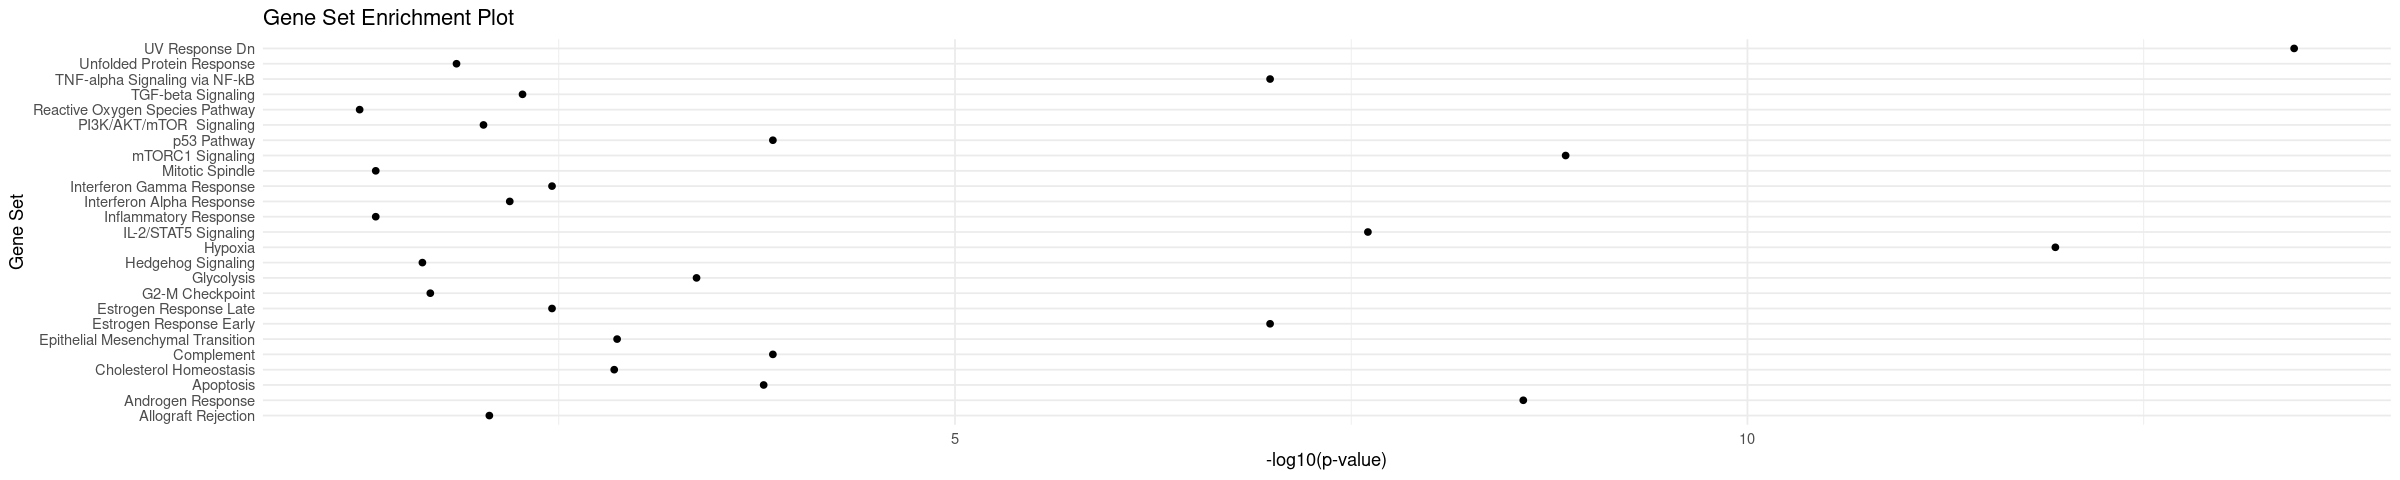

In [24]:
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=4)  # Adjust the width and height as needed

# Extract the enrichment results
enrichment_df <- as.data.frame(mut_enr[1:25,])

# Create an enrichment plot
enrichment_plot <- ggplot(enrichment_df, aes(x = -log10(Adjusted.P.value), y = Term)) +
  geom_point() +
  labs(title = "Gene Set Enrichment Plot", x = "-log10(p-value)", y = "Gene Set") +
  theme_minimal()

# Display the enrichment plot
print(enrichment_plot)

In [ ]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)



cluster = "AT1_cluster"
genes = mark_rds_obj2[mark_rds_obj2$cluster ==cluster & mark_rds_obj2$p_val_adj < 0.05 & 
              mark_rds_obj2$avg_log2FC >0, ]$gene

# read signature


dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)

dim(mut_enr)
#write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "meta-program 10"
cohort = paste0("nsclc cluster: ", cluster)
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top25"
h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- mut_enr[1:25,]

h_mut_enr_167 <- h_mut_enr1

ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0("sarc167_s410_gsea_results.pdf"), width = 10, height = 10)
print(myggp)
dev.off()

In [ ]:
unique(mark_rds_obj2$cluster)

In [ ]:
mark_rds_obj2

In [ ]:

# Filter for top 10 genes per group
top_markers <- mark_rds_obj2 %>% 
  group_by(cluster) %>% 
  top_n(n = 10, wt = avg_log2FC) # or use p_val_adj for adjustment

In [ ]:
# Extracting expression data of top genes
top_genes <- top_markers$gene


In [ ]:
top_genes

In [ ]:
rds_obj2_filtered

In [ ]:
rds_obj2_filtered_subset <- rds_obj2_filtered[top_genes, ]


In [ ]:
# Normalize the data for heatmap
data_for_heatmap <- NormalizeData(rds_obj2_filtered_subset, normalization.method = "LogNormalize", scale.factor = 10000)




In [ ]:
data_for_heatmap

In [ ]:
rds_obj2_filtered_subset

In [ ]:
AverageExpression(object = rds_obj2_filtered_subset)$RNA

In [ ]:
rds_obj2_filtered_subset@meta.data
Idents(rds_obj2_filtered_subset) <- 'Clustering'
cells_to_remove <- which(Idents(rds_obj2_filtered_subset) == 'NA')

# Remove cells with 'Mixed Lineage' identity
rds_obj2_filtered_subset <- rds_obj2_filtered_subset[-cells_to_remove, ]

# Check the new Idents in the filtered object
#Idents(rds_obj2_filtered_subset)


In [ ]:
rds_obj2_filtered_subset[, !(rds_obj2_filtered_subset$Clustering %in% c("NA", "Mixed Lineage"))]


In [ ]:
avg <- AverageExpression(rds_obj2_filtered_subset, features = NULL, add.ident = NULL, return.seurat = TRUE, verbose = TRUE)
avg$RNA

In [ ]:

avg[["CellName"]] <- colnames(avg)

avg <- subset(avg, CellName != "NA" & CellName != "Mixed Lineage")
avg@meta.data


In [ ]:
rds_obj2_filtered_subset@meta.data

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 12)  # Adjust width and height as needed

heatmap_obj <- DoHeatmap(avg, features = top_genes, group.by = "ident", size = 4, angle = 45,  draw.lines = FALSE)

heatmap_obj

In [ ]:
length(top_genes)

In [ ]:
ranks <- mark_rds_obj2$avg_log2FC
names(ranks) <- rownames(mark_rds_obj2)



In [ ]:
mark_rds_obj2

In [ ]:
mut_enr

In [81]:
dbs

[1] "MSigDB_Hallmark_2020"       "GO_Biological_Process_2021"

In [ ]:
library(fgsea)


In [ ]:
data(examplePathways)


In [ ]:
plotEnrichment(examplePathways[["5991130_Programmed_Cell_Death"]],
               ranks) + labs(title="Programmed Cell Death")